***
# Predicting patient survival in a hospital
***
## Introduction
During four weeks between June and July 2020, I took part in an online **Bootcamp** delivered by **[Dphi](https://dphi.tech/)**. At that time I was already using Python, NumPy, Pandas and Matplotlib to make exploraratory analysis, and cleaning datasets to make them more machine learnable. However, I haven't applied any machine learning yet, so this was my main movitivation to engage this Bootcamp. It was very intense and productive learning period and what I got was much more than learn, I experienced the power of the community in sharing knowledge and experiences.

This notebook is the result that I applied to the final assigment (a small Datathon) from the Bootcamp. 

Even though there's much room left from improvement here, It was my very beginning in this amazing world of Data Science.


## Objective
* Build a model to predict the chances of survival of a patient after 1 year of treatment.


## [Dataset](https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv)
* The dataset contains the patient records collected from a hospital (see the table bellow)
* The "Survived_1_year" column is a target variable which has binary entries (0 or 1).
  * `Survived_1_year == 0`, implies that the patient did not survive after 1 year of treatment
  * `Survived_1_year == 1`, implies that the patient survived after 1 year of treatment

|Feature                   | Description                                                                        |
|--------------------------|------------------------------------------------------------------------------------|
|ID_Patient_Care_Situation | Care situation of a patient during treatment                                       |
|Diagnosed_Condition       | The diagnosed condition of the patient                                             |
|Patient_ID                | Patient identifier number                                                          |
|Treated_with_drugs        | Class of drugs used during treatment                                               |
|Patient_Age               | Age of the patient                                                                 |
|Patient_Body_Mass_Index   | A calculated value based on the patient’s weight, height, etc.                     | 
|Patient_Smoker            | If the patient was a smoker or not                                                 |
|Patient_Rural_Urban       | If the patient stayed in Rural or Urban part of the country                        |
|Patient_mental_condition  | Mental condition of the patient                                                    |
| Number_of_previous_cond  | Total number of previous conditions of the patient                                 |
|A                         | Previous condition A of the patient before the start of the treatment              |
|B                         | Previous condition B of the patient before the start of the treatment              |
|C                         | Previous condition C of the patient before the start of the treatment              |
|D                         | Previous condition D of the patient before the start of the treatment              |
|E                         | Previous condition E of the patient before the start of the treatment              |
|F                         | Previous condition F of the patient before the start of the treatment              |
|Z                         | Previous condition Z of the patient before the start of the treatment              |
|Survived_1_year           | If the patient survived after one year (0 means did not survive; 1 means survived) |


## Evaluation criteria
* This task was a required assignment for the completion of the [DPhi Bootcamp](https://dphi.tech/).
* The metrics used as evalution criteria of the model was the **F1 Score** calculated using the predicted value of the model and true value of of `Survived_1_year` on the unseen [new test dataset](https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv).

# Loading data

In [1]:
# importing libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [3]:
# allow to show more rows and lines 
pd.set_option('max_rows', 300, 'max_columns', 300)

# Exploratory data analysis

Let's examine the firts rows of our dataset.

In [4]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [5]:
# dataset size
print(f'Number of rows: {pharma_data.shape[0]}')
print(f'Number of columns: {pharma_data.shape[1]}')

Number of rows: 23097
Number of columns: 18


The original dataset has `23097` rows $\times$ `18` columns.

Since the feature names as formed by uppercase and lowercase letters let's convert all of them to lowercase.

In [6]:
# convert column names to lowercase
pharma_data.columns = map(str.lower, pharma_data.columns)

Let's list the total number of unique values for each feature.

In [7]:
# show unique values for each variable in the dataset
unique_features = []

print(f'\nTotal number of rows: {pharma_data.shape[0]:12}\n')

for col in pharma_data.columns:
    unique_features.append(pharma_data[col].nunique())
#    print(f'{col: >21}: {pharma_data[col].nunique()}') # print the same information as following dataframe 

df_unique_features = pd.DataFrame(unique_features, pharma_data.columns, columns=['number of unique values'])
df_unique_features


Total number of rows:        23097



,number of unique values
id_patient_care_situation,23097
diagnosed_condition,53
patient_id,10570
treated_with_drugs,32
patient_age,78
patient_body_mass_index,10570
patient_smoker,3
patient_rural_urban,2
patient_mental_condition,1
a,2


At this point, we can also look if the dataset has missing values.

In [8]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_patient_care_situation  23097 non-null  int64  
 1   diagnosed_condition        23097 non-null  int64  
 2   patient_id                 23097 non-null  int64  
 3   treated_with_drugs         23084 non-null  object 
 4   patient_age                23097 non-null  int64  
 5   patient_body_mass_index    23097 non-null  float64
 6   patient_smoker             23097 non-null  object 
 7   patient_rural_urban        23097 non-null  object 
 8   patient_mental_condition   23097 non-null  object 
 9   a                          21862 non-null  float64
 10  b                          21862 non-null  float64
 11  c                          21862 non-null  float64
 12  d                          21862 non-null  float64
 13  e                          21862 non-null  flo

In [9]:
# total number of null values, if they are present
print('Features with missing values:\n')
pharma_data.isnull().sum()[pharma_data.isnull().sum() > 0]

Features with missing values:



treated_with_drugs       13
a                      1235
b                      1235
c                      1235
d                      1235
e                      1235
f                      1235
z                      1235
number_of_prev_cond    1235
dtype: int64

We found missing values for the following features:
* `treated_with_drugs`: 13 missing values
* `a`, `b`, `c`, `d`, `e`, `f`,`z` : 1235 missing values (each one)

In [10]:
# some descriptive statistics
pharma_data.describe()

,id_patient_care_situation,diagnosed_condition,patient_id,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year
count,23097.000000,23097.000000,23097.000000,23097.000000,23097.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,21862.000000,23097.000000
mean,16545.712041,26.413127,6261.280772,33.209768,23.454820,0.897905,0.136355,0.185070,0.083615,0.393239,0.053700,0.000595,1.750480,0.632247
std,9532.263503,15.030865,3595.990620,19.549882,3.807661,0.302780,0.343173,0.388363,0.276817,0.488480,0.225431,0.024379,0.770311,0.482204
min,2.000000,0.000000,1.000000,0.000000,1.089300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,8280.000000,13.000000,3181.000000,16.000000,20.205550,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,16597.000000,26.000000,6242.000000,33.000000,23.386199,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
75%,24825.000000,39.000000,9363.000000,50.000000,26.788154,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,1.000000
max,33014.000000,52.000000,12515.000000,149.000000,29.999579,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000


## Correlation matrix heatmap

We can use a heatmap to visualize how features are correlated with each other.

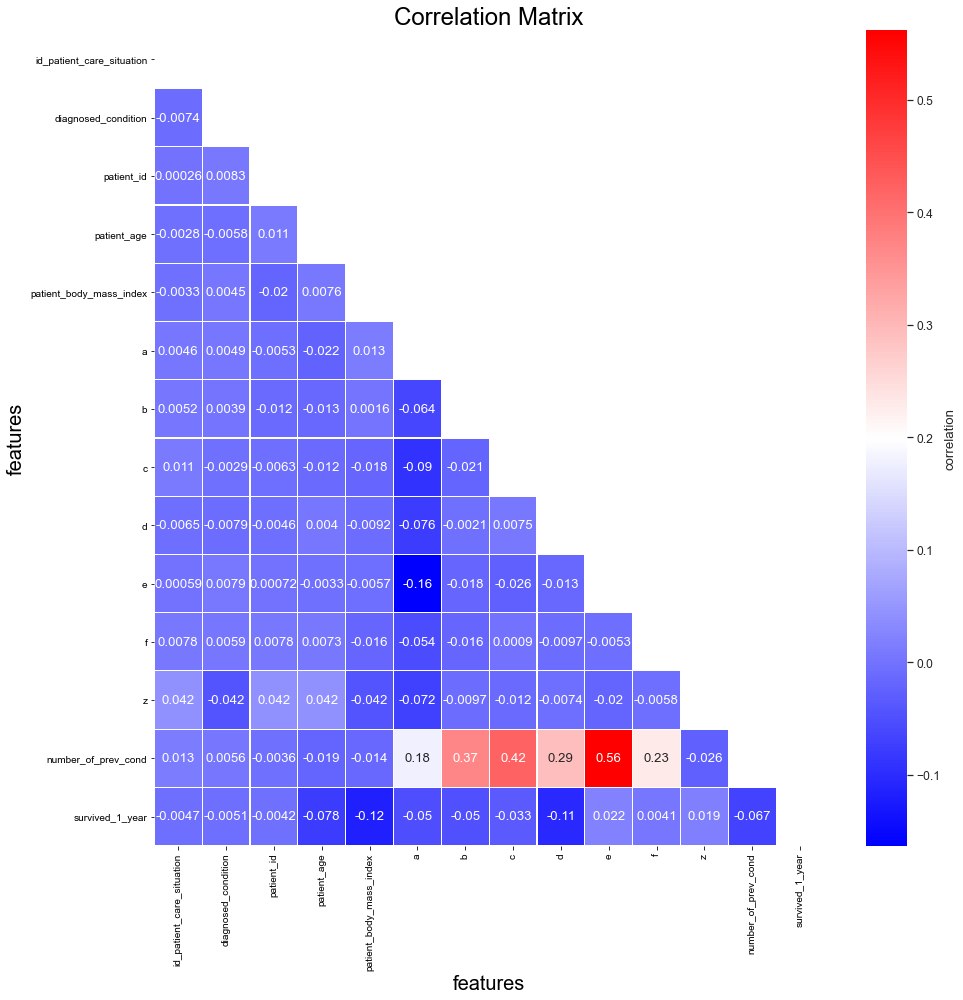

In [11]:
# Correlation matrix completely ignores any non-numeric column. 
plt.style.use('seaborn-deep')
fig, ax = plt.subplots(figsize=(15,15))

matrix = np.triu(pharma_data.corr('spearman'))
sns.set(font_scale=1.1)
sns.heatmap(pharma_data.corr(method='spearman'), linewidth= 0.1, annot=True, cmap='bwr', cbar_kws={'label': 'correlation'}, mask=matrix)
plt.xlabel("features", size=20)
plt.ylabel("features", size=20)
plt.title("Correlation Matrix", size=24)
plt.show()

The heatmap does not show strong linear correlations between the features.

## Scatter matrix plot

We can continue exploring the relatioships between the features and their distributions plotting a scatter matrix.

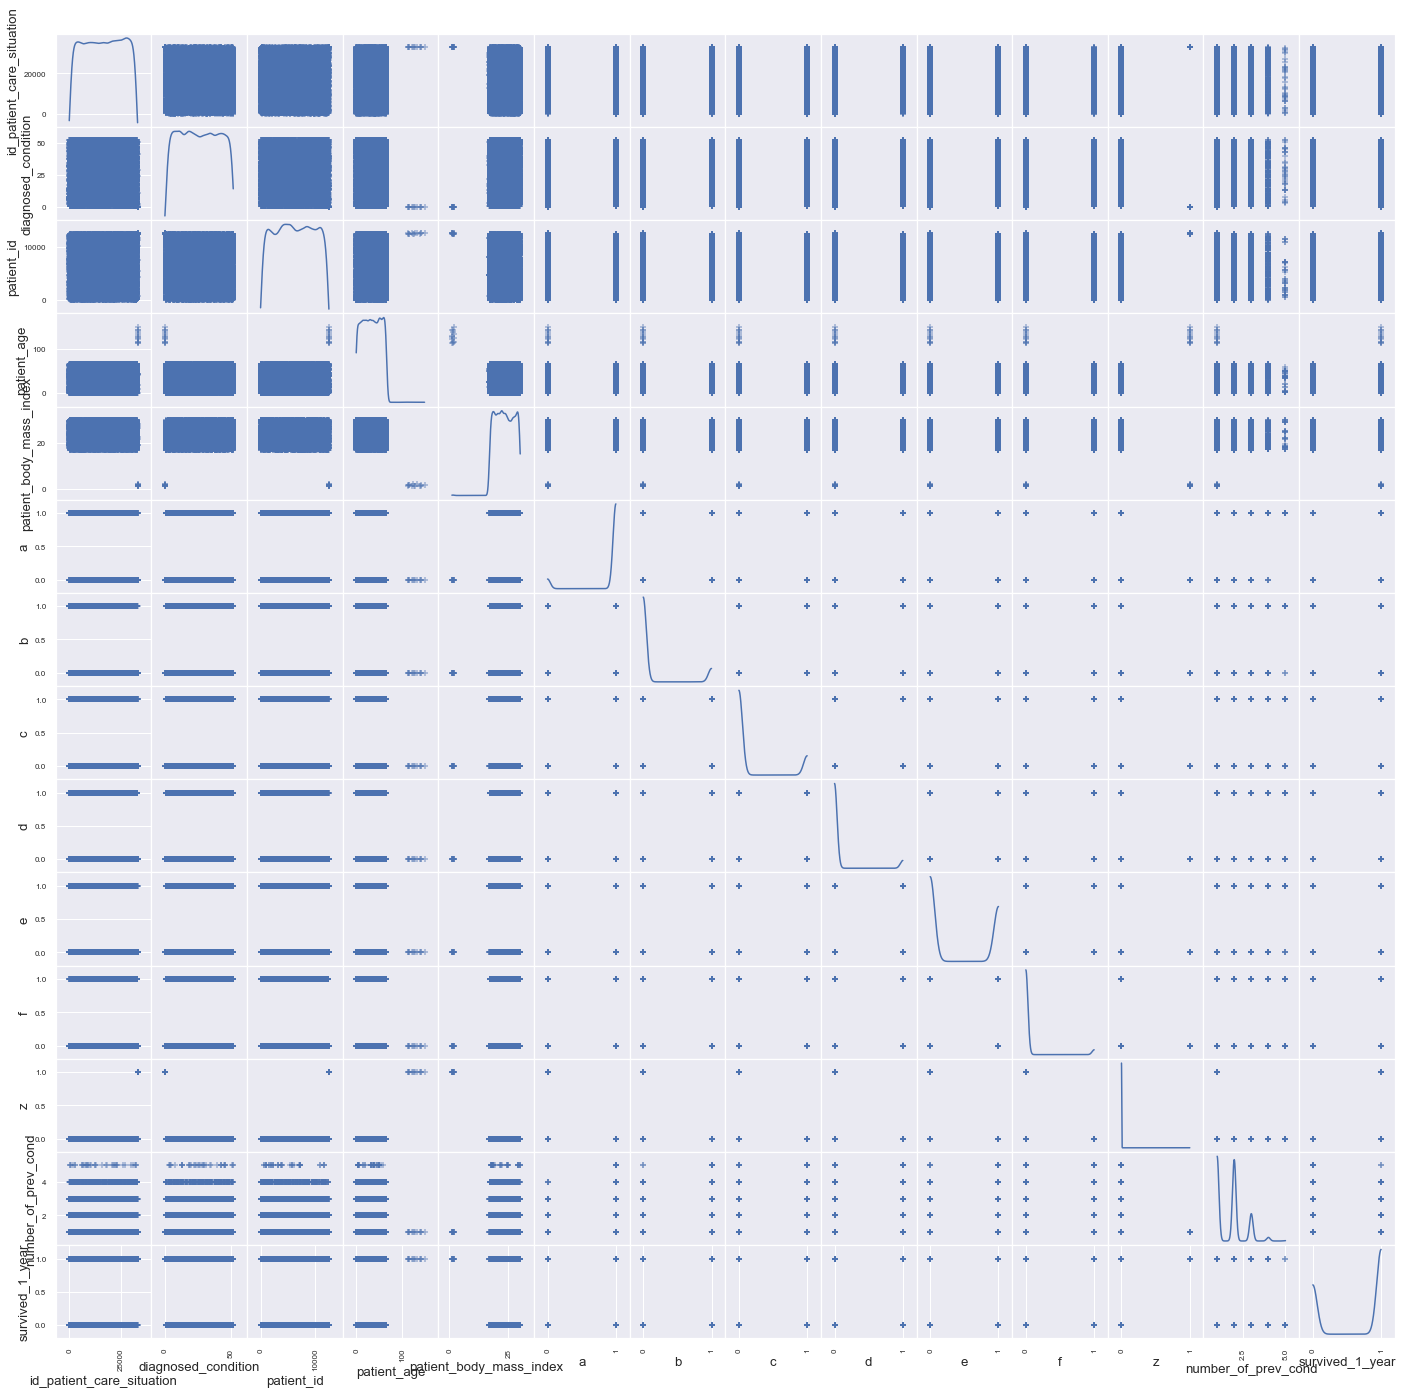

In [12]:
plt.style.use('seaborn-deep')
scatter_matrix(pharma_data, diagonal='kde', range_padding=0.4, marker='+', figsize=(24,24))
plt.show()

Let's examine features individually.

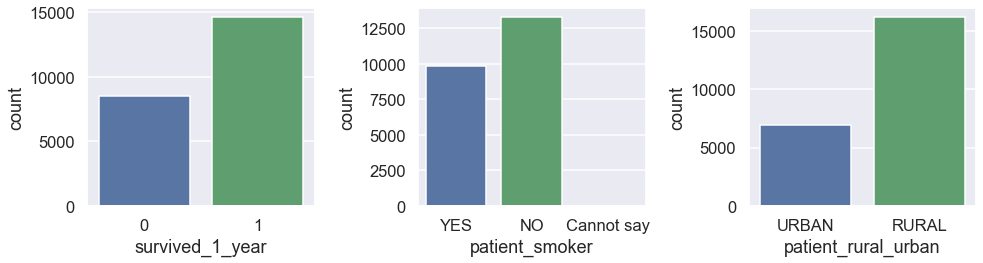

In [13]:
### countplot
sns.set_context('talk')

# create plot
fig, axs = plt.subplots(ncols = 3, nrows = 1, figsize = (14, 4))

sns.countplot(pharma_data['survived_1_year'], ax = axs[0])
#sns.countplot(pharma_data['diagnosed_condition'], ax = axs[0, 1])
sns.countplot(pharma_data['patient_smoker'], ax = axs[1])
sns.countplot(pharma_data['patient_rural_urban'], ax = axs[2])
#plt.title('Survival state, Smoker or not,  where stay')
plt.tight_layout()
plt.show()

In [14]:
print('Survival rates after 1 year of treatment:')
np.around(pharma_data['survived_1_year'].value_counts(normalize=True).sort_values(), 3)*100

Survival rates after 1 year of treatment:


0    36.8
1    63.2
Name: survived_1_year, dtype: float64

* After one year of treatment:
  * 37% of the patients died;
  * 63% of the patients survied. 
* Most patients are not smokers.
* Most patients stayes in rural areas.

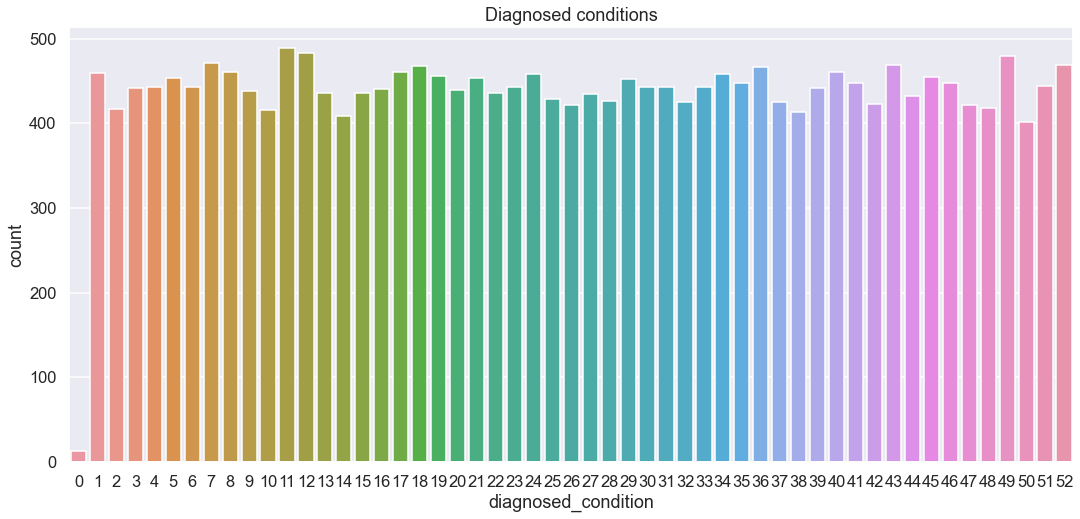

In [15]:
# countplot
f, ax = plt.subplots(figsize = (18,8))

sns.set_context('talk')

# create plot
sns.countplot(pharma_data['diagnosed_condition'])
plt.title('Diagnosed conditions')
plt.show()

The different diagnoses present approximately the same number of cases, with the exception of the zero that we will address later on.

In [16]:
# sort value counts for the feature
pharma_data['diagnosed_condition'].value_counts().sort_index()

0      13
1     459
2     417
3     442
4     443
5     454
6     443
7     471
8     460
9     438
10    416
11    489
12    483
13    436
14    408
15    436
16    440
17    461
18    468
19    456
20    439
21    454
22    436
23    443
24    458
25    429
26    421
27    434
28    426
29    452
30    443
31    443
32    425
33    443
34    458
35    447
36    466
37    425
38    413
39    442
40    460
41    447
42    423
43    469
44    432
45    455
46    448
47    422
48    418
49    479
50    401
51    444
52    469
Name: diagnosed_condition, dtype: int64

As we can see, there are 13 data points for `diagnosed_condition == 0`.

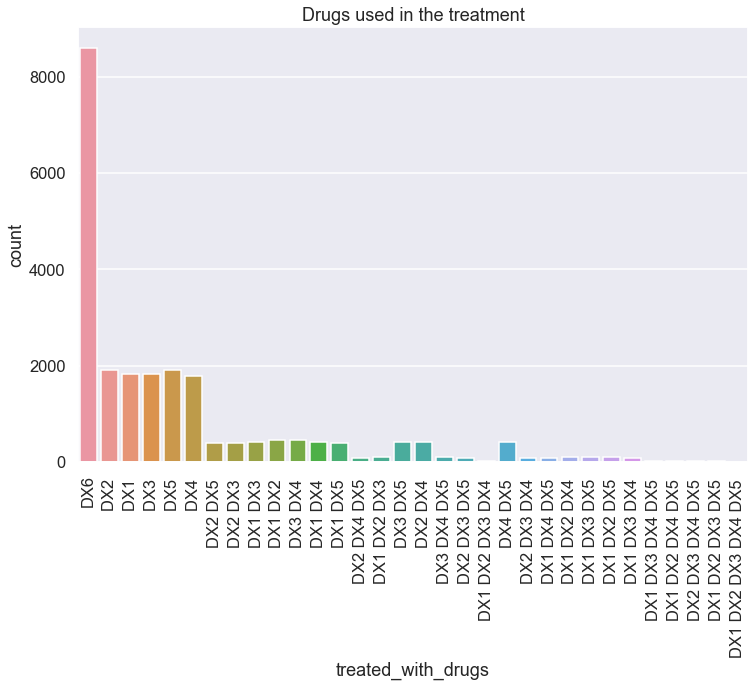

In [17]:
# countplot
f, ax = plt.subplots(figsize = (12,8))

sns.set_context('talk')

# create plot
chart = sns.countplot(pharma_data['treated_with_drugs'], orient='')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Drugs used in the treatment')
plt.show()

The most used drug in the treatments is `DX6`.

In [18]:
#plt.figure(figsize=(16,6))
#plt.tight_layout()
#sns.distplot(pharma_data['patient_age'], color='green', hist_kws={'edgecolor':'black'}, kde_kws={'linewidth': 4})
#plt.show()

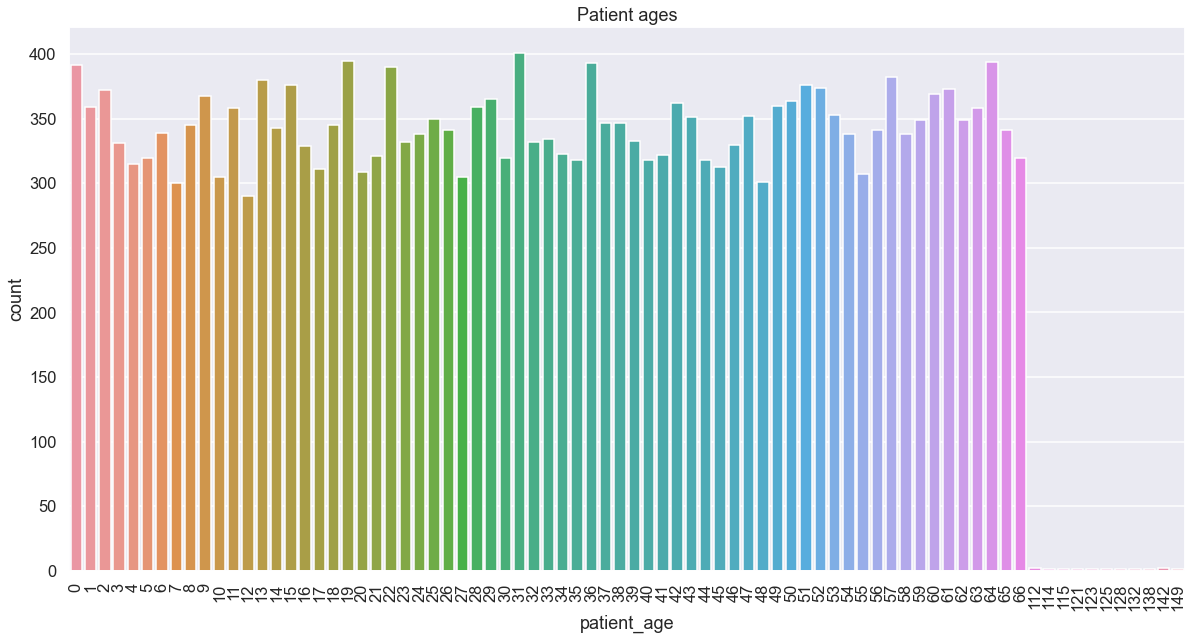

In [19]:
# countplot
f, ax = plt.subplots(figsize = (20,10))

sns.set_context('talk')

# create plot
chart = sns.countplot(pharma_data['patient_age'], orient='')
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.title('Patient ages')
plt.show()

In [20]:
# ages above 100
pharma_data['patient_age'].value_counts().sort_index()[pharma_data['patient_age'].value_counts().sort_index() < 5]

112    2
114    1
115    1
121    1
123    1
125    1
128    1
132    1
138    1
142    2
149    1
Name: patient_age, dtype: int64

Regarding the patient ages there are 13 values with ages greater than 110 years.

We can investigate this a little deeper.

In [21]:
# patient ages greater than 100 have missing values for treated_with_drugs and `Cannot say` for patient_smoker
pharma_data.loc[pharma_data['patient_age'] > 100]

,id_patient_care_situation,diagnosed_condition,patient_id,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year
4,33012,0,12513,NaN,128,1.3484,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
218,33008,0,12509,NaN,112,1.2925,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2540,33014,0,12515,NaN,149,1.7784,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
2711,33004,0,12505,NaN,123,1.9290,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4308,33001,0,12502,NaN,114,1.6239,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
4887,33011,0,12512,NaN,132,1.9896,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
6308,33010,0,12511,NaN,142,1.5701,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10388,33006,0,12507,NaN,138,1.3745,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
10663,33009,0,12510,NaN,142,1.1450,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
12782,33000,0,12501,NaN,112,1.5465,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


### Uncommon ages

The age of the patients in `patient_age` feature has:
* values varying from 0 to 66 with very similar counts and
* some values above 100 with low counts (see the output above)
 
Besides the fact that values above 100 years are very uncommon in real life, for `patient_age` greater that 100, it is also interesting to note that these data points:
* are the same that have missing values for the feature `treated_with_drugs`;
* are the same that have been attributed with `zero` for the feature `diagnosed_condition`;
* are the same that have been attributed with `Cannot say` for the feature `patient_smoker`;
* are have previous conditions equal to zero.


In [22]:
pharma_data['patient_smoker'].value_counts()

NO            13246
YES            9838
Cannot say       13
Name: patient_smoker, dtype: int64

For the feature `patient_smoke` we have only 13 values filled with "Cannot say"

In [23]:
pharma_data['patient_mental_condition'].unique()

array(['Stable'], dtype=object)

Feature `patient_mental_condition` has only one value "Stable".

Since this feature is constant it will not help predicting the target variable.

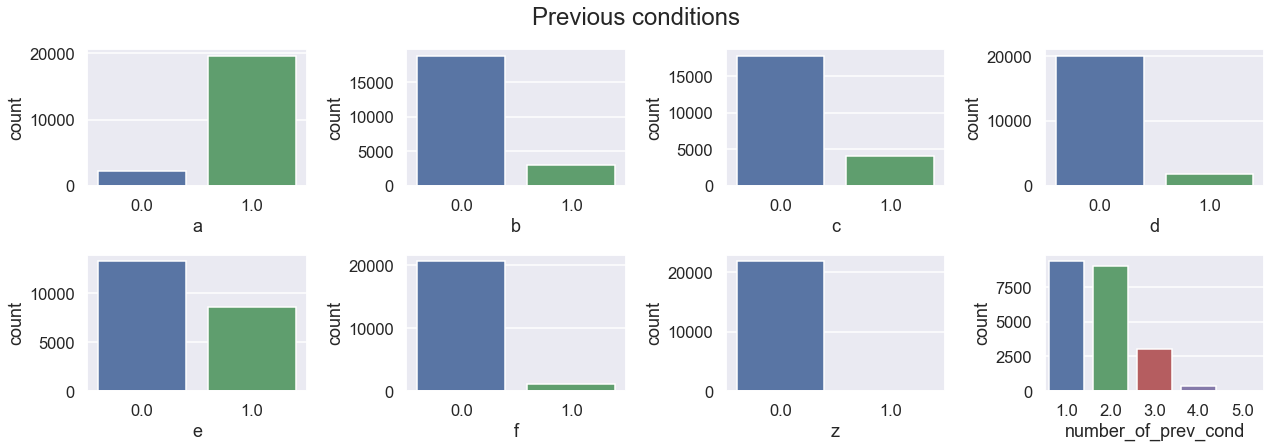

In [24]:
# plot prices x normalized features
fig, axs = plt.subplots(ncols = 4, nrows = 2, figsize = (18, 6))
sns.countplot(pharma_data['a'], ax = axs[0, 0])
sns.countplot(pharma_data['b'], ax = axs[0, 1])
sns.countplot(pharma_data['c'], ax = axs[0, 2])
sns.countplot(pharma_data['d'], ax = axs[0, 3])
sns.countplot(pharma_data['e'], ax = axs[1, 0])
sns.countplot(pharma_data['f'], ax = axs[1, 1])
sns.countplot(pharma_data['z'], ax = axs[1, 2])

chart = sns.countplot(pharma_data['number_of_prev_cond'], ax = axs[1,3])
chart.set_xticklabels(chart.get_xticklabels(), rotation=0)
plt.suptitle("Previous conditions", y=1.05, size=24)

plt.tight_layout()
plt.show()

Most of the patients have one or two previous conditions.

# Data preparations and data cleaning

Let's make our data more machine learnable.

## Removing rows with missing values for the columns `treated_with_drugs`

Inspecting the 13 values which ages are greater than 110 years we could not say that these data points are correct or not so we'll drop them.

In [25]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_patient_care_situation  23097 non-null  int64  
 1   diagnosed_condition        23097 non-null  int64  
 2   patient_id                 23097 non-null  int64  
 3   treated_with_drugs         23084 non-null  object 
 4   patient_age                23097 non-null  int64  
 5   patient_body_mass_index    23097 non-null  float64
 6   patient_smoker             23097 non-null  object 
 7   patient_rural_urban        23097 non-null  object 
 8   patient_mental_condition   23097 non-null  object 
 9   a                          21862 non-null  float64
 10  b                          21862 non-null  float64
 11  c                          21862 non-null  float64
 12  d                          21862 non-null  float64
 13  e                          21862 non-null  flo

We'll make two copies of our datset:
* `pharma`, and
* `pharma_drop_over100`.

For the second one we'll drop the 13 rows that contain ages above 110 years.

In [26]:
# let's make two copies of the dataset
# pharma = pharma_data.copy()
pharma_drop_over100 = pharma_data.copy()

# Let's drop rows with missing values only for the column treated_with_drugs. The only change will be axis = 0 instead of axis = 1
# this will remove all patients with ages greater than 100
pharma_drop_over100.dropna(axis = 0, subset=['treated_with_drugs'], inplace = True)

In [27]:
# pharma.head()

In [28]:
pharma_drop_over100.head()

,id_patient_care_situation,diagnosed_condition,patient_id,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0


In [29]:
# size of the datastes
#pharma.shape, pharma_drop_over100.shape
pharma_drop_over100.shape

(23084, 18)

In [30]:
#pharma.info()

In [31]:
pharma_drop_over100.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_patient_care_situation  23084 non-null  int64  
 1   diagnosed_condition        23084 non-null  int64  
 2   patient_id                 23084 non-null  int64  
 3   treated_with_drugs         23084 non-null  object 
 4   patient_age                23084 non-null  int64  
 5   patient_body_mass_index    23084 non-null  float64
 6   patient_smoker             23084 non-null  object 
 7   patient_rural_urban        23084 non-null  object 
 8   patient_mental_condition   23084 non-null  object 
 9   a                          21849 non-null  float64
 10  b                          21849 non-null  float64
 11  c                          21849 non-null  float64
 12  d                          21849 non-null  float64
 13  e                          21849 non-null  flo

In [32]:
pharma_drop_over100.loc[pharma_drop_over100['patient_age'] > 100]

,id_patient_care_situation,diagnosed_condition,patient_id,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,patient_mental_condition,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year


As we can see from above, there are no more ages above 110 years.

## Filling missing values in the features related to previous conditions

We'll fill the missing values wiht the mode.

In [33]:
# total number of null values, if they are present
#print('Features with missing values:\n')
#pharma.isnull().sum()[pharma.isnull().sum() > 0]

In [34]:
# total number of null values, if they are present
print('Features with missing values:\n')
pharma_drop_over100.isnull().sum()[pharma_drop_over100.isnull().sum() > 0]

Features with missing values:



a                      1235
b                      1235
c                      1235
d                      1235
e                      1235
f                      1235
z                      1235
number_of_prev_cond    1235
dtype: int64

There are some missing values that we can now fill with the mode.

In [35]:
# filling missing value with the mode
cols = ['a', 'b', 'c', 'd', 'e', 'f', 'z', 'number_of_prev_cond']

#pharma[cols] = pharma[cols].fillna(pharma[cols].mode().iloc[0])

pharma_drop_over100[cols] = pharma_drop_over100[cols].fillna(pharma_drop_over100[cols].mode().iloc[0])

In [36]:
# total number of null values, if they are present
#print('Features with missing values:\n')
#pharma.isnull().sum()[pharma.isnull().sum() > 0]

In [37]:
#pharma['treated_with_drugs'] = pharma['treated_with_drugs'].fillna(pharma['treated_with_drugs'].mode().iloc[0])

In [38]:
# total number of null values, if they are present
#print('Features with missing values:\n')
#pharma.isnull().sum()[pharma.isnull().sum() > 0]

In [39]:
# total number of null values, if they are present
print('Features with missing values:\n')
pharma_drop_over100.isnull().sum()[pharma_drop_over100.isnull().sum() > 0]

Features with missing values:



Series([], dtype: int64)

In [40]:
# patient ages greater than 100 have missing values for treated_with_drugs and `Cannot say` for patient_smoker
#pharma.loc[pharma['patient_age'] > 100]

In [41]:
#pharma.info()

There are no more missing values!

## Removing feature columns

We'll remove the following feature columns:
* `patient_mental_condition` (contains only one value)
* `id_patient_care_situation` (contains a different value for each data point)
* `id_patient`


In [42]:
# removing features
#pharma = pharma.drop(columns=['patient_mental_condition'])
pharma_drop_over100 = pharma_drop_over100.drop(columns=['patient_mental_condition', 'id_patient_care_situation', 'patient_id'])

In [43]:
# dataset size
#print(f'Number of rows: {pharma.shape[0]}')
#print(f'Number of columns: {pharma.shape[1]}')

In [44]:
# dataset size
print(f'Number of rows: {pharma_drop_over100.shape[0]}')
print(f'Number of columns: {pharma_drop_over100.shape[1]}')

Number of rows: 23084
Number of columns: 15


## Encoding categorical variables: one hot encoding 

Let's create dummies for categorical columns.

In [45]:
# this function allow us to have better column names 
def one_hot_col(df, col):
    return df[col].str.get_dummies()

In [46]:
# apply one-hot enconder to one column
#drugs = one_hot_col(pharma, 'treated_with_drugs')

# Place the DataFrames side by side
#pharma = pd.concat([pharma, drugs], axis = 1)

# drop columns
#pharma = pharma.drop(columns=['treated_with_drugs'])

In [47]:
#pharma = pd.get_dummies(data=pharma, columns=['patient_smoker'], prefix=['smoker'], prefix_sep='_')

In [48]:
#pharma = pd.get_dummies(data=pharma, columns=['number_of_prev_cond'], prefix=['number_of_prev_cond'], prefix_sep='_')

In [49]:
#pharma = pd.get_dummies(data=pharma, columns=['diagnosed_condition'], prefix=['diagnosed_condition'], prefix_sep='_')

In [50]:
# apply one-hot enconder to one column
#area = one_hot_col(pharma, 'patient_rural_urban')

# Place the DataFrames side by side
#pharma = pd.concat([pharma, area], axis = 1)

# drop columns
#pharma = pharma.drop(columns=['patient_rural_urban'])

In [51]:
#pharma.head()

In [52]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
#data['Country']= label_encoder.fit_transform(data[‘Country']) 
#print(data.head())

In [53]:
# apply one-hot enconder to one column
drugs = one_hot_col(pharma_drop_over100, 'treated_with_drugs')

# Place the DataFrames side by side
pharma_drop_over100 = pd.concat([pharma_drop_over100, drugs], axis = 1)

# drop columns
pharma_drop_over100 = pharma_drop_over100.drop(columns=['treated_with_drugs'])

#pharma_drop_over100['treated_with_drugs'] = label_encoder.fit_transform(pharma_drop_over100['treated_with_drugs'])

In [54]:
pharma_drop_over100 = pd.get_dummies(data=pharma_drop_over100, columns=['patient_smoker'], prefix=['smoker'], prefix_sep='_')

In [55]:
# pharma_drop_over100 = pd.get_dummies(data=pharma_drop_over100, columns=['number_of_prev_cond'], prefix=['number_of_prev_cond'], prefix_sep='_')
pharma_drop_over100['number_of_prev_cond'] = label_encoder.fit_transform(pharma_drop_over100['number_of_prev_cond'])

In [56]:
#pharma_drop_over100 = pd.get_dummies(data=pharma_drop_over100, columns=['diagnosed_condition'], prefix=['diagnosed_condition'], prefix_sep='_')
pharma_drop_over100['diagnosed_condition'] = label_encoder.fit_transform(pharma_drop_over100['diagnosed_condition'])

In [57]:
# apply one-hot enconder to one column
area = one_hot_col(pharma_drop_over100, 'patient_rural_urban')

# Place the DataFrames side by side
pharma_drop_over100 = pd.concat([pharma_drop_over100, area], axis = 1)

# drop columns
pharma_drop_over100 = pharma_drop_over100.drop(columns=['patient_rural_urban'])

In [58]:
pharma_drop_over100.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year,DX1,DX1 DX2,DX1 DX2 DX3,DX1 DX2 DX3 DX4,DX1 DX2 DX3 DX4 DX5,DX1 DX2 DX3 DX5,DX1 DX2 DX4,DX1 DX2 DX4 DX5,DX1 DX2 DX5,DX1 DX3,DX1 DX3 DX4,DX1 DX3 DX4 DX5,DX1 DX3 DX5,DX1 DX4,DX1 DX4 DX5,DX1 DX5,DX2,DX2 DX3,DX2 DX3 DX4,DX2 DX3 DX4 DX5,DX2 DX3 DX5,DX2 DX4,DX2 DX4 DX5,DX2 DX5,DX3,DX3 DX4,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6,smoker_NO,smoker_YES,RURAL,URBAN
0,7,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,4,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,22,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,50,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,44,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


Converting the categorical data for the feature `treated_with_drugs` create columns with names separated by spaces. Let's remove spaces before and after the strings and replace the space between words by an underscore.

In [59]:
# remove space in columns names (before and after the string)
# substitute spaces inside the string by underscore
#pharma.columns = pharma.columns.str.strip()
#pharma.columns = pharma.columns.str.replace(" ","_")

In [60]:
# remove space in columns names (before and after the string)
# substitute spaces inside the string by underscore
pharma_drop_over100.columns = pharma_drop_over100.columns.str.strip()
pharma_drop_over100.columns = pharma_drop_over100.columns.str.replace(" ","_")

In [61]:
#pharma.head()

In [62]:
pharma_drop_over100.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year,DX1,DX1_DX2,DX1_DX2_DX3,DX1_DX2_DX3_DX4,DX1_DX2_DX3_DX4_DX5,DX1_DX2_DX3_DX5,DX1_DX2_DX4,DX1_DX2_DX4_DX5,DX1_DX2_DX5,DX1_DX3,DX1_DX3_DX4,DX1_DX3_DX4_DX5,DX1_DX3_DX5,DX1_DX4,DX1_DX4_DX5,DX1_DX5,DX2,DX2_DX3,DX2_DX3_DX4,DX2_DX3_DX4_DX5,DX2_DX3_DX5,DX2_DX4,DX2_DX4_DX5,DX2_DX5,DX3,DX3_DX4,DX3_DX4_DX5,DX3_DX5,DX4,DX4_DX5,DX5,DX6,smoker_NO,smoker_YES,RURAL,URBAN
0,7,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,4,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,22,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0
3,50,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
5,44,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1


Let's list the total number of unique values for each feature.

In [63]:
# show unique values for each variable in the dataset
#unique_features = []

#print(f'\nTotal number of rows: {pharma.shape[0]:12}\n')

#for col in pharma.columns:
#    unique_features.append(pharma[col].nunique())
#    print(f'{col: >21}: {pharma_data[col].nunique()}') # print the same information as following dataframe 

#df_unique_features = pd.DataFrame(unique_features, pharma.columns, columns=['number of unique values'])
#df_unique_features

In [64]:
# show unique values for each variable in the dataset
unique_features = []

print(f'\nTotal number of rows: {pharma_drop_over100.shape[0]:12}\n')

for col in pharma_drop_over100.columns:
    unique_features.append(pharma_drop_over100[col].nunique())
#    print(f'{col: >21}: {pharma_data[col].nunique()}') # print the same information as following dataframe 

df_unique_features = pd.DataFrame(unique_features, pharma_drop_over100.columns, columns=['number of unique values'])
df_unique_features


Total number of rows:        23084



,number of unique values
diagnosed_condition,52
patient_age,67
patient_body_mass_index,10557
a,2
b,2
c,2
d,2
e,2
f,2
z,1


In [65]:
#pharma.shape, pharma_drop_over100.shape
pharma_drop_over100.shape

(23084, 48)

In [66]:
#list(pharma_drop_over100.columns)

## Removing features where drugs where use in combination

We'll keep only treatment where only one drug was used.

In [67]:
pharma_drop_over100 = pharma_drop_over100[['diagnosed_condition',
                                            'patient_age',
                                            'patient_body_mass_index',
                                            'a',
                                            'b',
                                            'c',
                                            'd',
                                            'e',
                                            'f',
                                            'z',
                                            'number_of_prev_cond',
                                            'survived_1_year',
                                            'DX1',
                                            'DX2',
                                            'DX3',
                                            'DX4',
                                            'DX5',
                                            'DX6',
                                            'smoker_NO',
                                            'smoker_YES',
                                            'RURAL',
                                            'URBAN']]

In [68]:
pharma_drop_over100.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,survived_1_year,DX1,DX2,DX3,DX4,DX5,DX6,smoker_NO,smoker_YES,RURAL,URBAN
0,7,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,1,0,1,0,1
1,4,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,1,0,0,0,0,0,1,1,0
2,22,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,1,0
3,50,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,1,0,0,0,0,0,1,0,0,1
5,44,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,1,0,1,0,1


In [69]:
#pharma.shape, pharma_drop_over100.shape
pharma_drop_over100.shape

(23084, 22)

# Separating features and target variables

In [70]:
# matrix of features
X = pharma_drop_over100.drop('survived_1_year', axis = 1)

# target variable vector
y = pharma_drop_over100['survived_1_year']

In [71]:
X.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,smoker_NO,smoker_YES,RURAL,URBAN
0,7,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,1
1,4,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,0
2,22,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,1,0
3,50,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1
5,44,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,0,1


In [72]:
y.head()

0    0
1    1
2    0
3    1
5    0
Name: survived_1_year, dtype: int64

# Feature scaling

We'll apply normalization to the non categorical features:
* `diagnosed_condition`
* `patient_age`
* `patient_body_mass_index`

In [73]:
from sklearn import preprocessing
#from sklearn.prepocessing import MinMaxScaler

# choosen features 
##col_names = ['diagnosed_condition', 
##             'patient_age', 
##             'patient_body_mass_index']

# create a minimum and maximum processor object
##normalization = preprocessing.MinMaxScaler()

# run the normalizer on specific columns of the dataframe
##for col in col_names:
##    X[col] = normalization.fit_transform(np.array(X[col]).reshape(-1,1))


In [74]:
X.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,smoker_NO,smoker_YES,RURAL,URBAN
0,7,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,1,0,1,0,1
1,4,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,1,0,0,0,0,0,1,1,0
2,22,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,1,0
3,50,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,1,0,0,1
5,44,47,26.155120,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0,1,0,1


In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23084 entries, 0 to 23096
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosed_condition      23084 non-null  int64  
 1   patient_age              23084 non-null  int64  
 2   patient_body_mass_index  23084 non-null  float64
 3   a                        23084 non-null  float64
 4   b                        23084 non-null  float64
 5   c                        23084 non-null  float64
 6   d                        23084 non-null  float64
 7   e                        23084 non-null  float64
 8   f                        23084 non-null  float64
 9   z                        23084 non-null  float64
 10  number_of_prev_cond      23084 non-null  int64  
 11  DX1                      23084 non-null  int64  
 12  DX2                      23084 non-null  int64  
 13  DX3                      23084 non-null  int64  
 14  DX4                   

# Splitting the dataset into training and test sets

In [76]:
# splitting dataset into training and test sets
# X: feature matrix
# y: target variable vector
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (17313, 21)
Train target shape   :  (17313,)
Test features shape  :  (5771, 21)
Test target shape    :  (5771,)


# Data modeling

We'll build models using the following algorithms:
* LogisticRegression
* LinearSVC
* SVC
* KNeighborsClassifier
* RandomForestClassifier
* GradientBoostingClassifier
* DecisionTreeClassifier
* GaussianNB
* XGBClassifier

In [77]:
# importing libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from xgboost import plot_importance

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

In [78]:
# define a list of models
models=[LogisticRegression(max_iter=100000, n_jobs=-1, random_state=42),
#        LinearSVC(max_iter=1000000, multi_class='crammer_singer'),
        SVC(kernel='rbf', random_state=42),
        KNeighborsClassifier(n_jobs=-1),
        RandomForestClassifier(random_state=42),
        DecisionTreeClassifier(random_state=42),
        GradientBoostingClassifier(random_state=42),
        GaussianNB(),
        XGBClassifier(random_state=42)]

In [79]:
# LinearSVC do not converge without standardization
# Train the LinearSVC model
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# Create support vector classifier
svc = LinearSVC(C=1.0, max_iter=100000, random_state=42)

# Train model
model_svc = svc.fit(X_train_std, y_train)
#model_svc = svc.fit(X_train, y_train)

# Predict class of new observation
pred = svc.predict(X_test_std)
#pred = svc.predict(X_test)

acc_svc = accuracy_score(pred, y_test)
f1_svc = f1_score(y_test, pred)
#eval_svc = {'Modelling Algorithm': 'LinearSVC','Accuracy': acc_svc, 'F1 score': f1_svc}

In [80]:
print('Modelling Algorithm: LinearSVM')
print(f'acc = {accuracy_score(pred, y_test)}    f1 ={f1_score(y_test, pred)}')

Modelling Algorithm: LinearSVM
acc = 0.724831051810778    f1 =0.7968270214943706


In [81]:
# store accuracy and f1 score for LinearSCV in a dataframe
svclist = [{'Modelling Algorithm':'LinearSVC','Accuracy': acc_svc, 'F1 score': f1_svc}]
df_svc = pd.DataFrame(svclist)
#df_svc

In [82]:
model_names=['LogisticRegression',
#             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'RandomForestClassifier',
             'DecisionTree',
             'GradientBoostingClassifier',
             'GaussianNB',
             'XGBoost']

acc=[]
f1 = []

eval_acc={}
eval_f1={}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(X_train,y_train)
    pred=classification_model.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
    f1.append(f1_score(y_test, pred))

model_names.append('LinearSVC')
acc.append(acc_svc)
f1.append(f1_svc)
    
eval_acc={'Modelling Algorithm':model_names,'Accuracy':acc}
eval_acc

eval_f1={'Modelling Algorithm':model_names,'F1 score':f1}

In [83]:
df_acc = pd.DataFrame(eval_acc)

In [84]:
df_f1 = pd.DataFrame(eval_f1)

In [85]:
score_table = pd.concat([df_acc, df_f1['F1 score']], axis = 1)

score_table.sort_values(by='F1 score', ascending=[False])

,Modelling Algorithm,Accuracy,F1 score
5,GradientBoostingClassifier,0.825680,0.868737
7,XGBoost,0.823081,0.862935
3,RandomForestClassifier,0.804540,0.848550
1,rbfSVM,0.743025,0.821433
4,DecisionTree,0.760873,0.811475
0,LogisticRegression,0.726044,0.798162
8,LinearSVC,0.724831,0.796827
2,KNearestNeighbors,0.726217,0.794378
6,GaussianNB,0.691041,0.747200


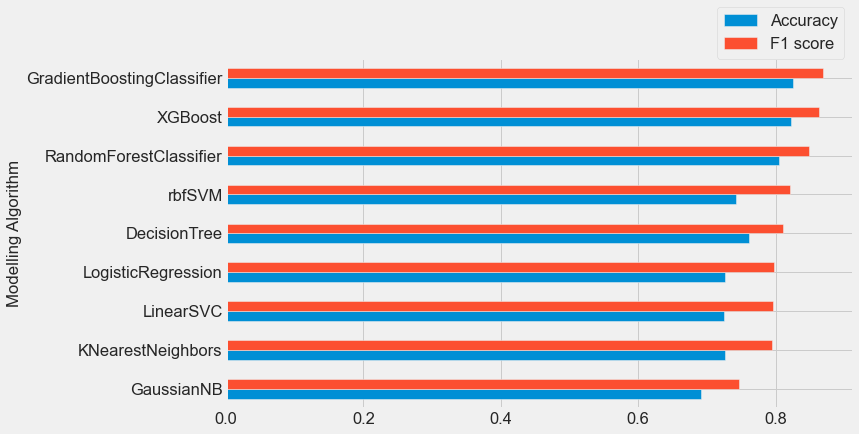

In [86]:
plt.style.use('fivethirtyeight')
ax = score_table.sort_values(by=['F1 score']).plot(kind='barh', x='Modelling Algorithm', figsize=(10,6), stacked=False)
ax.legend(bbox_to_anchor=(1,1.17))
plt.grid(which = 'minor', axis = 'x', color ='k')
plt.show()

The best **F1 score** was obtained by the algorithm GradientBoostingClassifier.

## GradientBoostingClassifier

Since this model gave the best result, let's investigate it a little bit to see if we could improve its performance.

### Learning rate

In [87]:
from sklearn.metrics import roc_curve, auc

learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

train_results = []
test_results =[]

for alpha in learning_rates:
    model = GradientBoostingClassifier(learning_rate=alpha, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)
    

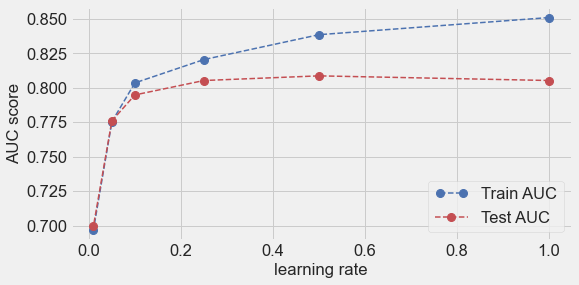

In [88]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(8,4))

line1, = plt.plot(learning_rates, train_results, '--bo', label="Train AUC", linewidth=1.5, markersize=8)
line2, = plt.plot(learning_rates, test_results, '--ro', label="Test AUC", linewidth=1.5, markersize=8)

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('learning rate')
plt.show()

It seems that the best learning rate for this data set is 0.5.

### Number of trees (`n_estimators`)

Increasing the number of trees can improve the learning, but it can also slow down the training.

In [89]:
n_estimators = [1, 2, 4, 8, 16, 32, 100, 200, 500, 1000, 2000]

train_results = []
test_results =[]

for estimator in n_estimators:
    model = GradientBoostingClassifier(n_estimators=estimator, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

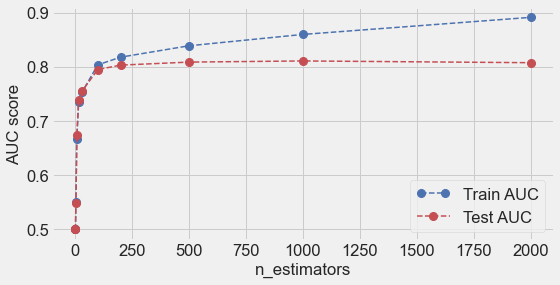

In [90]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(8,4))

line1, = plt.plot(n_estimators, train_results, '--bo', label="Train AUC", linewidth=1.5, markersize=8)
line2, = plt.plot(n_estimators, test_results, '--ro', label="Test AUC", linewidth=1.5, markersize=8)

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

It seems that we can number of estimators equal to 100.

### Deepness of tree (`max_depth`)

It is a measure of the "deepnees" of the tree. Increasing this parameter we'll have more splits.

In [91]:
max_depths = np.linspace(1, 32, 32, endpoint=True)

train_results = []
test_results =[]

for depth in max_depths:
    model = GradientBoostingClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

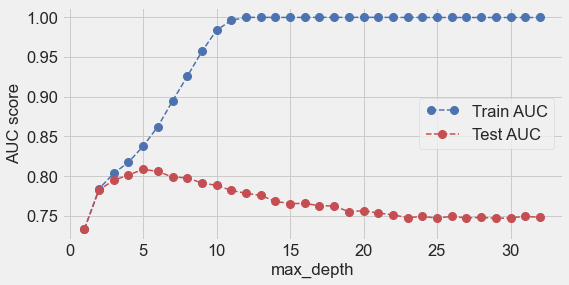

In [92]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(8,4))

line1, = plt.plot(max_depths, train_results, '--bo', label="Train AUC", linewidth=1.5, markersize=8)
line2, = plt.plot(max_depths, test_results, '--ro', label="Test AUC", linewidth=1.5, markersize=8)

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_depth')
plt.show()

We can use `max_depth = 3`.

### `min_samples_split`

Thi parameter is the number of samples required to split an internal node.

In [93]:
#min_samples_splits = np.linspace(0.1, 1.0, 10, endpoint=True)
min_samples_splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 2, 3]

train_results = []
test_results =[]

for sample in min_samples_splits:
    model = GradientBoostingClassifier(min_samples_split=sample, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

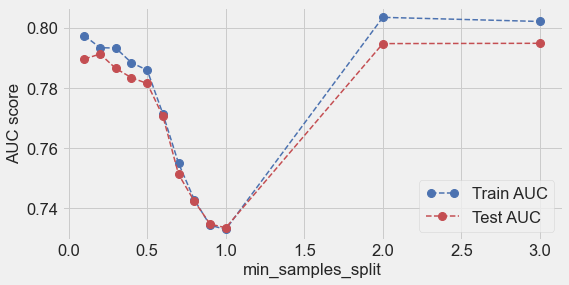

In [94]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(8,4))

line1, = plt.plot(min_samples_splits, train_results, '--bo', label="Train AUC", linewidth=1.5, markersize=8)
line2, = plt.plot(min_samples_splits, test_results, '--ro', label="Test AUC", linewidth=1.5, markersize=8)

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_split')
plt.show()

We can use `min_samples_split` equal to 2.

`min_samples_leaf`

Represents the minimum number of samples required to be at a lead node.

In [95]:
#min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
min_samples_leafs = [0.1, 0.2, 0.3, 0.4, 0.5, 1, 2]

train_results = []
test_results =[]

for sample in min_samples_leafs:
    model = GradientBoostingClassifier(min_samples_leaf=sample, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

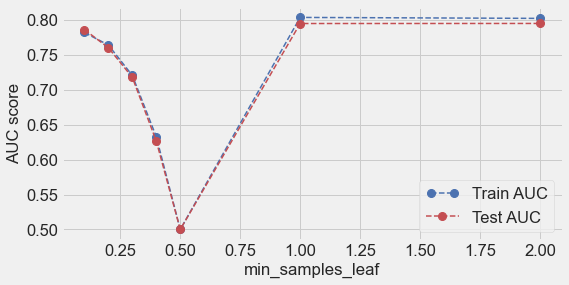

In [96]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(8,4))

line1, = plt.plot(min_samples_leafs, train_results, '--bo', label="Train AUC", linewidth=1.5, markersize=8)
line2, = plt.plot(min_samples_leafs, test_results, '--ro', label="Test AUC", linewidth=1.5, markersize=8)

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min_samples_leaf')
plt.show()

We can use `min_samples_leaf` equal to 1.

### `max_features`

Number of features to consider when looking for the best split.

In [97]:
max_features = list(range(1, pharma_drop_over100.shape[1]))

train_results = []
test_results =[]

for feature in max_features:
    model = GradientBoostingClassifier(max_features=feature, random_state=42)
    model.fit(X_train, y_train)
    
    train_pred = model.predict(X_train)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    
    y_pred = model.predict(X_test)
    
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)

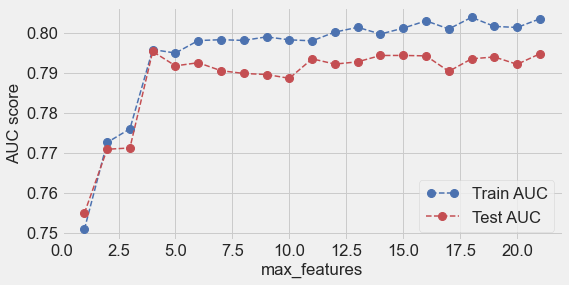

In [98]:
from matplotlib.legend_handler import HandlerLine2D

plt.figure(figsize=(8,4))

line1, = plt.plot(max_features, train_results, '--bo', label="Train AUC", linewidth=1.5, markersize=8)
line2, = plt.plot(max_features, test_results, '--ro', label="Test AUC", linewidth=1.5, markersize=8)

plt.legend(handler_map = {line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max_features')
plt.show()

In [99]:
gbc_tuned = GradientBoostingClassifier(learning_rate=0.5, 
                                       n_estimators=70, 
                                       max_depth=3, 
                                       min_samples_leaf=1,
                                       min_samples_split=2 , 
                                       max_features=21,
                                       random_state=42)
#gbc_model  = GradientBoostingClassifier(random_state=42)

gbc_tuned.fit(X_train, y_train)


y_pred = gbc_tuned.predict(X_test)

gbc_tuned_ac = accuracy_score(y_test, y_pred)
gbc_tuned_fscore = f1_score(y_test ,y_pred)


print("GradientBoosting Tuned Model Accuracy:", gbc_tuned_ac)
print("GradientBoosting Tuned Model F1 Score:", gbc_tuned_fscore)

GradientBoosting Tuned Model Accuracy: 0.8346906948535783
GradientBoosting Tuned Model F1 Score: 0.8729693741677762


In [100]:
gbc_baseline  = GradientBoostingClassifier(random_state=42)

gbc_baseline.fit(X_train, y_train)

y_pred = gbc_baseline.predict(X_test)

gbc_base_ac = accuracy_score(y_test, y_pred)
gbc_base_fscore = f1_score(y_test ,y_pred)
print("GradientBoosting Baseline Model Accuracy:", gbc_base_ac)
print("GradientBoosting Baseline Model F1 Score:", gbc_base_fscore)

GradientBoosting Baseline Model Accuracy: 0.8256801247617397
GradientBoosting Baseline Model F1 Score: 0.8687369519832986


# Feature importance

Having in mind the improvement of the model, we can also investigate the importance of each feature in the dataset.

## Boruta

In [101]:
from boruta import BorutaPy

In [102]:
# define Boruta feature selection method
# boruta_selector = BorutaPy(forest, n_estimators='auto', verbose=2)
boruta_selector = BorutaPy(gbc_baseline, n_estimators='auto', verbose=2, random_state=42)

# find all relevant features
boruta_selector.fit(np.array(X_train), np.array(y_train))

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	21
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	14
Tentative: 	0
Rejected: 	7


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	14
Tentative: 	0
Rejected: 	7


BorutaPy(estimator=GradientBoostingClassifier(n_estimators=216,
                                              random_state=RandomState(MT19937) at 0x2636C6198C8),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x2636C6198C8, verbose=2)

In [103]:
# check selected features
print("Selected Features: ", boruta_selector.support_)
 
# check ranking of features
print("Ranking: ",boruta_selector.ranking_)

print("No. of significant features: ", boruta_selector.n_features_)

Selected Features:  [ True  True  True  True  True  True  True False False False  True False
 False False  True False  True  True  True  True  True]
Ranking:  [1 1 1 1 1 1 1 7 6 8 1 3 4 5 1 2 1 1 1 1 1]
No. of significant features:  14


In [104]:
# Let's visualise it better in the form of a table
selected_gbc_features = pd.DataFrame({'Feature':list(X_train.columns),
                                      'Ranking':boruta_selector.ranking_})
selected_gbc_features.sort_values(by='Ranking')

,Feature,Ranking
0,diagnosed_condition,1
18,smoker_YES,1
17,smoker_NO,1
16,DX6,1
14,DX4,1
19,RURAL,1
10,number_of_prev_cond,1
5,c,1
4,b,1
3,a,1


In [105]:
# create a new subset of the data with only the selected features
X_important_train = boruta_selector.transform(np.array(X_train))
X_important_test = boruta_selector.transform(np.array(X_test))

In [106]:
# Create a new classifier for the most important features
gbc_important = GradientBoostingClassifier(random_state=42)

# Train the new classifier on the new dataset containing the most important features
gbc_important.fit(X_important_train, y_train)

GradientBoostingClassifier(random_state=42)

In [107]:
# Apply The Limited Featured Classifier To The Test Data
y_important_pred = gbc_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature (4 Features) Model
gbc_imp_ac = accuracy_score(y_test, y_important_pred)
gbc_imp_fscore = f1_score(y_test, y_important_pred)

print("Limited Features Boruta Model Accuracy:", gbc_imp_ac)
print("Limited Features Boruta Model F1 Score:", gbc_imp_fscore)

Limited Features Boruta Model Accuracy: 0.8246404435972968
Limited Features Boruta Model F1 Score: 0.8678851174934726


## XGBoost

Feature Importances :  [0.03987282 0.02986208 0.03294315 0.05527763 0.03615049 0.05948159
 0.08291943 0.01370057 0.01711471 0.         0.02216129 0.02592659
 0.01918549 0.02048786 0.0384278  0.0311607  0.23165652 0.16441895
 0.         0.07925241 0.        ]


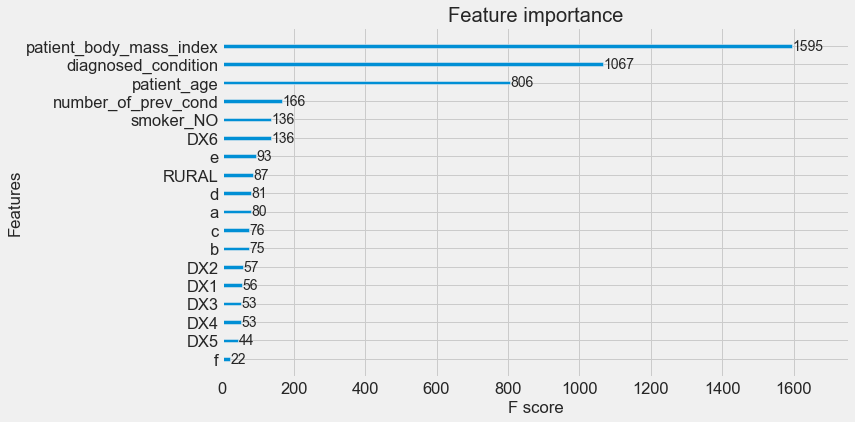

In [108]:
xgb_base = XGBClassifier(random_state=42)
xgb_base.fit(X_train, y_train)
#gbc_model = GradientBoostingClassifier(random_state=42)
#gbc_model.fit(X_train, y_train)
print("Feature Importances : ", xgb_base.feature_importances_)
#print("Feature Importances : ", gbc_model.feature_importances_)

# plot feature importance
plt.rcParams["figure.figsize"] = (10, 6)
plot_importance(xgb_base)
#plot_importance(gbc_model)
plt.show()

The six most important features are:
* `patient_body_mass_index`
* `diagnosed_condition`
* `patient_age`
* `number_of_previous_cond`
* `DX6`
* `smoker_NO`

In [109]:
from sklearn.feature_selection import SelectFromModel 

selection = SelectFromModel(xgb_base, threshold='median')
selection.fit(X_train, y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model
selection_xgb = XGBClassifier(random_state=42)
selection_xgb.fit(select_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [110]:
# xgboost without feature selection
y_pred = xgb_base.predict(X_test)

xgb_base_ac = accuracy_score(y_test, y_pred)
xgb_base_fscore = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", xgb_base_ac)
print("XGB Baseline Model F1 Score:", xgb_base_fscore)

XGB Baseline Model Accuracy: 0.8230809218506324
XGB Baseline Model F1 Score: 0.8629346220969257


In [111]:
# xgboost with feature selection

# Evaluating the model
predictions = selection_xgb.predict(select_X_test)      # predict for selected features of X_test
xgb_sel_accuracy = accuracy_score(y_test, predictions)        # Calculating accuracy score on test data
xgb_sel_fscore = f1_score(y_test , predictions)               # Calculating F1 score on test data


# View The Accuracy Of Our Limited Feature (4 Features) Model
print("Limited Features XGBoost Model Accuracy:", xgb_sel_accuracy)
print("Limited Features XGBoost Model F1 Score:", xgb_sel_fscore)

Limited Features XGBoost Model Accuracy: 0.8080055449662104
Limited Features XGBoost Model F1 Score: 0.8516733601070949


***

In [112]:
# # xgboost with feature selection and tuned using GridSeachCV (bellow)

selection = SelectFromModel(xgb_base, threshold='median')
selection.fit(X_train, y_train)

# Transform the train and test features
select_X_train = selection.transform(X_train)
select_X_test = selection.transform(X_test) 

# train model
#selection_model = XGBClassifier()
# here we used parameters obtained in the following section
selection_xgb_tuned = XGBClassifier(booster = 'gbtree', 
                          colsample_bytree = 1,
                          gamma = 0, 
                          importance_type = 'gain',
                          learning_rate = 0.3, 
                          max_depth = 3, 
                          min_child_weight = 1, 
                          n_estimators = 100, 
                          n_jobs = -1, 
                          objective = 'binary:logistic', 
                          reg_alpha = 0.1, 
                          random_state=42
                          )
selection_xgb_tuned.fit(select_X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=42,
              reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [113]:
# Evaluating the model
predictions = selection_xgb_tuned.predict(select_X_test)      # predict for selected features of X_test
xgb_sel_tun_accuracy = accuracy_score(y_test, predictions)        # Calculating accuracy score on test data
xgb_sel_tun_fscore = f1_score(y_test , predictions)               # Calculating F1 score on test data


# View The Accuracy Of Our Limited Feature (4 Features) Model
print("Limited Features XGBoost Model Accuracy:", xgb_sel_tun_accuracy)
print("Limited Features XGBoost Model F1 Score:", xgb_sel_tun_fscore)

Limited Features XGBoost Model Accuracy: 0.8137237913706463
Limited Features XGBoost Model F1 Score: 0.8557240638840424


The best performance (F1 score) was obtained using feature selection (choosing the median as threshold) and using hyperparameter tuning with `GridSearchCV()`.

## Fine tuning XGBoost


In [114]:
# assess the incremental performance by the incremental number of trees
eval_set = [(X_train, y_train), (X_test, y_test)]    # train and test sets
eval_metric = ["auc", "error"]                       # metrics
#%time selection_model_tuned.fit(X_train, y_train, eval_metric = eval_metric, eval_set = eval_set, verbose = True)
%time xgb_base.fit(X_train, y_train, eval_metric = eval_metric, eval_set = eval_set, verbose = True)

[0]	validation_0-auc:0.85731	validation_0-error:0.21781	validation_1-auc:0.86043	validation_1-error:0.21227
[1]	validation_0-auc:0.87304	validation_0-error:0.20563	validation_1-auc:0.87038	validation_1-error:0.21348
[2]	validation_0-auc:0.89068	validation_0-error:0.19870	validation_1-auc:0.88692	validation_1-error:0.20031
[3]	validation_0-auc:0.89745	validation_0-error:0.19234	validation_1-auc:0.89229	validation_1-error:0.19494
[4]	validation_0-auc:0.90158	validation_0-error:0.18628	validation_1-auc:0.89568	validation_1-error:0.18940
[5]	validation_0-auc:0.90441	validation_0-error:0.18379	validation_1-auc:0.89914	validation_1-error:0.18714
[6]	validation_0-auc:0.91267	validation_0-error:0.17328	validation_1-auc:0.90430	validation_1-error:0.18073
[7]	validation_0-auc:0.91558	validation_0-error:0.17028	validation_1-auc:0.90608	validation_1-error:0.18108
[8]	validation_0-auc:0.91851	validation_0-error:0.16537	validation_1-auc:0.90757	validation_1-error:0.17830
[9]	validation_0-auc:0.92141

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [115]:
results = xgb_base.evals_result()  # y-axis values
epochs = len(results['validation_0']['error'])  # n_estimators value
x_axis = range(0, epochs)

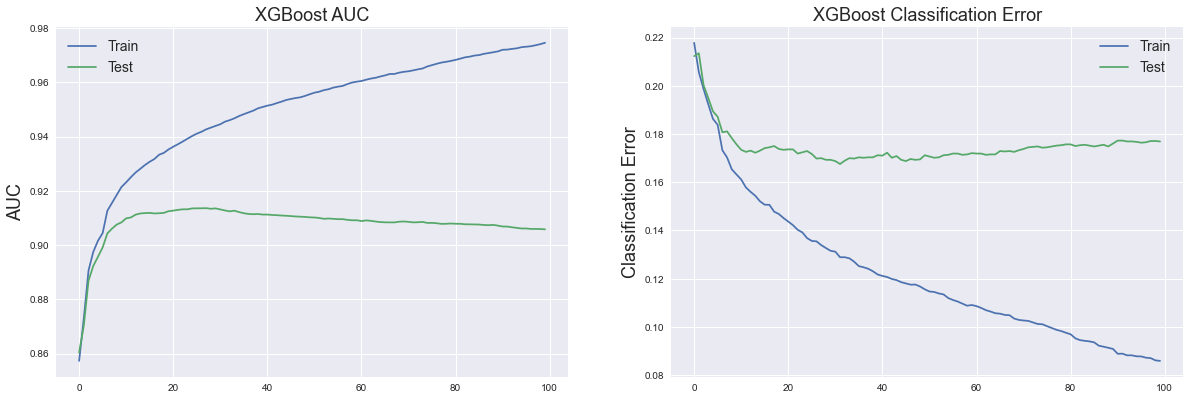

In [116]:
plt.style.use('seaborn')

#fig, ax = plt.subplots(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
ax1.plot(x_axis, results['validation_0']['auc'], label = "Train")
ax1.plot(x_axis, results['validation_1']['auc'], label = "Test")
ax1.legend(fontsize=14)
ax1.set_ylabel('AUC', size=18)
ax1.set_title('XGBoost AUC', size=18)

ax2.plot(x_axis, results['validation_0']['error'], label = "Train")
ax2.plot(x_axis, results['validation_1']['error'], label = "Test")
ax2.legend(fontsize=14)
ax2.set_ylabel('Classification Error', size=18)
ax2.set_title('XGBoost Classification Error', size=18)

#ax1.plt.ylabel('AUC', size=14)

plt.show()

It seems that until 5 iterations the model learned significantly. After this point the error decrease more slowly. We can use the parameter `early_stopping_rounds` to reduce the number of trees.

In [117]:
xgb_fine_tun = XGBClassifier(booster = 'gbtree', 
                               scale_pos_weight =1,
#                               colsample_bytree = 1,
                               gamma = 0, 
                               importance_type = 'cover',
                               learning_rate = 0.3, 
#                               subsample = 0.8,
                               max_depth = 3, 
                               min_child_weight = 1, 
                               n_estimators = 1000, 
                               n_jobs = -1, 
                               objective = 'binary:logistic', 
#                               reg_alpha = 0.13,
                               reg_alpha = 0.1,
                               random_state=42)

In [118]:
xgb_fine_tun.fit(X_train, y_train, eval_metric = eval_metric, eval_set = eval_set, verbose = False, early_stopping_rounds=20)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='cover', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              random_state=42, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [119]:
# xgboost without feature selection
y_pred = xgb_fine_tun.predict(X_test)

xgb_fine_ac = accuracy_score(y_test, y_pred)
xgb_fine_fscore = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", xgb_fine_ac)
print("XGB Baseline Model F1 Score:", xgb_fine_fscore)

XGB Baseline Model Accuracy: 0.8313983711661757
XGB Baseline Model F1 Score: 0.8708349926987919


In [120]:
# assess the incremental performance by the incremental number of trees
#eval_set = [(select_X_train, y_train), (select_X_test, y_test)]
eval_set = [(X_train, y_train), (X_test, y_test)]    # train and test sets
eval_metric = ["auc", "error"]                       # metrics
#%time selection_model_tuned.fit(select_X_train, y_train, eval_metric = eval_metric, eval_set = eval_set, verbose = True)
%time xgb_fine_tun.fit(X_train, y_train, eval_metric = eval_metric, eval_set = eval_set, verbose = True)

[0]	validation_0-auc:0.78531	validation_0-error:0.24958	validation_1-auc:0.78504	validation_1-error:0.25143
[1]	validation_0-auc:0.80223	validation_0-error:0.24271	validation_1-auc:0.80558	validation_1-error:0.23999
[2]	validation_0-auc:0.82141	validation_0-error:0.23930	validation_1-auc:0.82271	validation_1-error:0.23757
[3]	validation_0-auc:0.83246	validation_0-error:0.23578	validation_1-auc:0.83734	validation_1-error:0.23358
[4]	validation_0-auc:0.86153	validation_0-error:0.22763	validation_1-auc:0.86388	validation_1-error:0.22630
[5]	validation_0-auc:0.86622	validation_0-error:0.22463	validation_1-auc:0.86872	validation_1-error:0.22145
[6]	validation_0-auc:0.87711	validation_0-error:0.21493	validation_1-auc:0.87840	validation_1-error:0.20915
[7]	validation_0-auc:0.88467	validation_0-error:0.20938	validation_1-auc:0.88664	validation_1-error:0.20603
[8]	validation_0-auc:0.88561	validation_0-error:0.20580	validation_1-auc:0.88814	validation_1-error:0.20066
[9]	validation_0-auc:0.89060

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='cover', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              random_state=42, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [121]:
results = xgb_fine_tun.evals_result()  # y-axis values
epochs = len(results['validation_0']['error'])  # n_estimators value
x_axis = range(0, epochs)

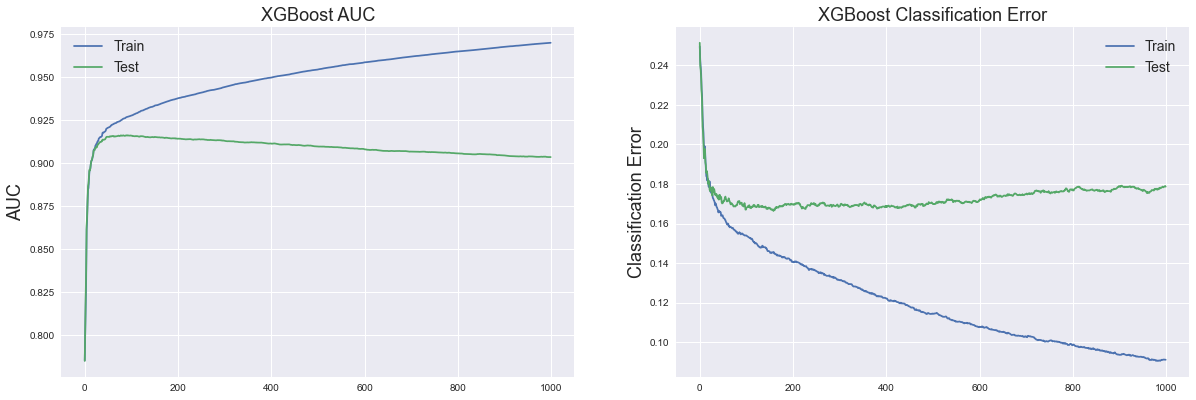

In [122]:
plt.style.use('seaborn')

#fig, ax = plt.subplots(figsize=(12,8))
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(18,6))
ax1.plot(x_axis, results['validation_0']['auc'], label = "Train")
ax1.plot(x_axis, results['validation_1']['auc'], label = "Test")
ax1.legend(fontsize=14)
ax1.set_ylabel('AUC', size=18)
ax1.set_title('XGBoost AUC', size=18)

ax2.plot(x_axis, results['validation_0']['error'], label = "Train")
ax2.plot(x_axis, results['validation_1']['error'], label = "Test")
ax2.legend(fontsize=14)
ax2.set_ylabel('Classification Error', size=18)
ax2.set_title('XGBoost Classification Error', size=18)

#ax1.plt.ylabel('AUC', size=14)

plt.show()

It seems that until 20 iterations the model learned significantly. After this point the error decrease more slowly. We can use the parameter `early_stopping_rounds` to reduce the number of trees.

In [123]:
xgb_fine_tun2 = XGBClassifier(booster = 'gbtree', 
                               scale_pos_weight =1,
#                               colsample_bytree = 1,
                               gamma = 0, 
                               importance_type = 'gain',
                               learning_rate = 0.3, 
#                               subsample = 0.8,
                               max_depth = 3, 
                               min_child_weight = 1, 
                               n_estimators = 1000, 
                               n_jobs = -1, 
                               objective = 'binary:logistic', 
#                               reg_alpha = 0.13,
                               reg_alpha = 0.1,
                               random_state=42)

#xgb_fine_tun2.fit(select_X_train, y_train, eval_metric = eval_metric, eval_set = eval_set, verbose = False, early_stopping_rounds=40)
xgb_fine_tun2.fit(X_train, y_train, eval_metric = eval_metric, eval_set = eval_set, verbose = False, early_stopping_rounds=40)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=1000, n_jobs=-1, num_parallel_tree=1,
              random_state=42, reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [124]:
# Evaluating the model
predictions = xgb_fine_tun2.predict(X_test)      # predict for selected features of X_test
xgb2_accuracy = accuracy_score(y_test, predictions)        # Calculating accuracy score on test data
xgb2_fscore = f1_score(y_test , predictions)               # Calculating F1 score on test data


# View The Accuracy Of Our Limited Feature (4 Features) Model
print("Limited Features XGBoost Model Accuracy:", xgb2_accuracy)
print("Limited Features XGBoost Model F1 Score:", xgb2_fscore)

Limited Features XGBoost Model Accuracy: 0.8329578929128401
Limited Features XGBoost Model F1 Score: 0.8718766613503456


## Hyperparameter tuning 
### (GridSeachCV & XGBoost)

In [125]:
from pprint import pprint

In [126]:
# show parameters for xgboost
xgb = XGBClassifier(random_state=42)
print('Parameter currently in use:\n')
pprint(xgb.get_params())

Parameter currently in use:

{'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'objective': 'binary:logistic',
 'random_state': 42,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}


In [127]:
# create hyperparameter space

#base_score: None
booster = ['gbtree']
# colsample_bylevel = None
#colsample_bynode = None
colsample_bytree=[0.5, 0.7, 1]
gamma = [0, 0.2, 0.4]
# gpu_id = None
importance_type = ['gain']
#interaction_constraints = None
learning_rate = [0.01, 0.03, 0.1, 0.3]
#max_delta_step = None
max_depth = [3, 5, 7]
min_child_weight = [1, 2, 6]
#missing = nan
# monotone_constraints = None
n_estimators = [100]
n_jobs = [-1]
#num_parallel_tree = None
objective = ['binary:logistic']
#random_state = 42
reg_alpha = [1e-5, 1e-2, 0.1, 1, 100]
#reg_lambda = None
#scale_pos_weight = None
#subsample = None
#tree_method = None
#validate_parameters = None
#verbosity = [2]
    
# create hyperparameters options
hyperparameters = {'booster': booster, 
                   'colsample_bytree': colsample_bytree, 
                   'gamma': gamma, 
                   'importance_type': importance_type, 
                   'learning_rate': learning_rate,
                   'max_depth': max_depth,
                   'min_child_weight': min_child_weight,
                   'n_estimators': n_estimators,
                   'n_jobs': n_jobs,
                   'objective': objective,
                   'reg_alpha': reg_alpha,
                   }

In [128]:
from sklearn.model_selection import GridSearchCV

In [129]:
### xgb = XGBClassifier()
### xgb_grid = GridSearchCV(estimator = xgb,
#                        param_grid = hyperparameters,
#                        cv = 10,
#                        verbose = 2,
#                        n_jobs = -1)

### xgb_grid.fit(X_train, y_train)

In [130]:
### print(xgb_grid.best_params_)

### Using XGBoost tuned and a reduced number of features (manual selection)

In [131]:
xgb_tuned =XGBClassifier(booster = 'gbtree', 
                         scale_pos_weight =1,
#                               colsample_bytree = 1,
                         gamma = 0, 
                         importance_type = 'cover',
                         learning_rate = 0.3, 
                         subsample = 0.8,
                         max_depth = 3, 
                         min_child_weight = 1, 
                         n_estimators = 1000, 
                         n_jobs = -1, 
                         objective = 'binary:logistic', 
#                          reg_alpha = 0.13,
                         reg_alpha = 0.1,
                         random_state=42)

xgb_tuned_sel = XGBClassifier(booster = 'gbtree', 
                         scale_pos_weight =1,
#                               colsample_bytree = 1,
                         gamma = 0, 
                         importance_type = 'cover',
                         learning_rate = 0.3, 
                         subsample = 0.8,
                         max_depth = 3, 
                         min_child_weight = 1, 
                         n_estimators = 1000, 
                         n_jobs = -1, 
                         objective = 'binary:logistic', 
#                          reg_alpha = 0.13,
                         reg_alpha = 0.1,
                         random_state=42)

In [132]:
xgb_tuned.fit(X_train, y_train)

y_pred = xgb_tuned.predict(X_test)

xgb_ac = accuracy_score(y_test, y_pred)
xgb_fscore = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", xgb_ac)
print("Limited Features XGBoost Model F1 Score:", xgb_fscore)

XGB Baseline Model Accuracy: 0.8182290764165656
Limited Features XGBoost Model F1 Score: 0.8589864229063046


Build a model with the six top features.

In [133]:
X_train_selected = X_train.copy()
X_test_selected = X_test.copy()

In [134]:
# X_train_selected = X_train_selected[['id_patient_care_situation','patient_id','patient_age','patient_body_mass_index','smoker_NO','DX6']]
X_train_selected = X_train_selected[['patient_body_mass_index', 'diagnosed_condition', 'patient_age', 'number_of_prev_cond', 'DX6', 'smoker_NO']]
#X_train_selected = X_train_selected[['patient_body_mass_index', 'diagnosed_condition', 'patient_age']]

In [135]:
# X_test_selected = X_test_selected[['id_patient_care_situation','patient_id','patient_age','patient_body_mass_index','smoker_NO','DX6']]
X_test_selected = X_test_selected[['patient_body_mass_index', 'diagnosed_condition', 'patient_age', 'number_of_prev_cond', 'DX6', 'smoker_NO']]
#X_test_selected = X_test_selected[['patient_body_mass_index', 'diagnosed_condition', 'patient_age']]

In [136]:
X_train_selected.head(1)

,patient_body_mass_index,diagnosed_condition,patient_age,number_of_prev_cond,DX6,smoker_NO
6075,20.795713,8,19,0,0,1


In [137]:
xgb_tuned_sel.fit(X_train_selected, y_train)

y_pred = xgb_tuned_sel.predict(X_test_selected)

xgb_ac = accuracy_score(y_test, y_pred)
xgb_fscore = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", xgb_ac)
print("Limited Features XGBoost Model F1 Score:", xgb_fscore)

XGB Baseline Model Accuracy: 0.7932767284699359
Limited Features XGBoost Model F1 Score: 0.8403158881006559


Using only the six top features did not improve the model.

## Random Forest

In [138]:
rf = RandomForestClassifier(random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

In [139]:
rf_ac = accuracy_score(y_test, y_pred)
rf_fscore = f1_score(y_test ,y_pred)

print("RF Model Accuracy:", rf_ac)
print("RF Model F1 Score:", rf_fscore)

RF Model Accuracy: 0.804539941084734
RF Model F1 Score: 0.8485499462943072


In [140]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [141]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model

# Instantiate the grid search model
### grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
###                          cv = 5, n_jobs = -1, verbose = 2)

In [142]:
### grid_search.fit(X_train, y_train)

In [143]:
### print(grid_search.best_params_)

In [144]:
rf_tuned = RandomForestClassifier(bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=3, min_samples_split=12, n_estimators=1000)

rf_tuned.fit(X_train, y_train)

y_pred = rf_tuned.predict(X_test)

In [145]:
rf_ac = accuracy_score(y_test, y_pred)
rf_fscore = f1_score(y_test ,y_pred)

print("RF Model Accuracy:", rf_ac)
print("RF Model F1 Score:", rf_fscore)

RF Model Accuracy: 0.8090452261306532
RF Model F1 Score: 0.8548472075869337


In [146]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'criterion':['gini', 'entropy'],
    'bootstrap': [True, False],
    'max_depth': [90],
    'max_features': [3, 5],
    'min_samples_leaf': [2,3],
    'min_samples_split': [12, 15],
    'n_estimators': [1000, 2000],
    'random_state':[42],
    'class_weight':['balanced',None]
}
# Create a based model

# Instantiate the grid search model
###grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
###                          cv = 10, n_jobs = -1, verbose = 2)

In [147]:
### grid_search2.fit(X_train, y_train)

In [148]:
### print(grid_search2.best_params_)

In [149]:
rf_tuned2 = RandomForestClassifier(bootstrap=False, max_depth=90, max_features=5, min_samples_leaf=2, min_samples_split=15, n_estimators=2000, random_state = 42)

rf_tuned2.fit(X_train, y_train)

y_pred = rf_tuned2.predict(X_test)

In [150]:
rf_ac = accuracy_score(y_test, y_pred)
rf_fscore = f1_score(y_test ,y_pred)

print("RF Model Accuracy:", rf_ac)
print("RF Model F1 Score:", rf_fscore)

RF Model Accuracy: 0.8138970715647201
RF Model F1 Score: 0.8558776167471819


## Multi-layer perceptron (MLP)

In [151]:
from sklearn.neural_network import MLPClassifier

In [152]:
mlp = MLPClassifier(hidden_layer_sizes=(32), activation='relu', solver='adam', max_iter=1000, alpha=0.0001, random_state=42, tol=0.0001, learning_rate='constant')
mlp.fit(X_train, y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [153]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_train,predict_train))
print(classification_report(y_train,predict_train))

[[4310 2070]
 [1669 9264]]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      6380
           1       0.82      0.85      0.83     10933

    accuracy                           0.78     17313
   macro avg       0.77      0.76      0.76     17313
weighted avg       0.78      0.78      0.78     17313



In [154]:
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[1403  711]
 [ 605 3052]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68      2114
           1       0.81      0.83      0.82      3657

    accuracy                           0.77      5771
   macro avg       0.75      0.75      0.75      5771
weighted avg       0.77      0.77      0.77      5771



In [155]:
mlp_ac = accuracy_score(y_test, predict_test)
mlp_fscore = f1_score(y_test, predict_test)

print("XGB Baseline Model Accuracy:", mlp_ac)
print("Limited Features XGBoost Model F1 Score:", mlp_fscore)

XGB Baseline Model Accuracy: 0.7719632645988563
Limited Features XGBoost Model F1 Score: 0.8226415094339623


In [156]:
parameter_space = {
    'hidden_layer_sizes':[(15), (32), (32, 32, 32), (104)],
    'activation':['tanh', 'relu', 'logistic'],
    'solver':['sgd','adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate':['constant', 'adaptative']
}

In [157]:
#mlp_model = MLPClassifier(max_iter=100)
#mlp_grid = GridSearchCV(mlp_model, parameter_space, n_jobs=-1, cv=5)

In [158]:
#mlp_grid.fit(X_train, y_train)

In [159]:
#print(mlp_grid.best_params_)

{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': 15, 'learning_rate': 'constant', 'solver': 'adam'}

## Cross validation

In [160]:
from sklearn.model_selection import cross_validate
import sklearn

In [161]:
cv_results = cross_validate(xgb_fine_tun, X, y, cv=10, scoring=["f1"])
cv_results

{'fit_time': array([4.42117357, 4.42117453, 4.3822782 , 4.49896574, 4.70940304,
        4.45109415, 5.08140826, 5.26092792, 4.38626742, 4.35933924]),
 'score_time': array([0.01595783, 0.01595759, 0.01695418, 0.02493358, 0.01496029,
        0.01595688, 0.0209446 , 0.02493358, 0.02194142, 0.01496005]),
 'test_f1': array([0.86480978, 0.856469  , 0.86340641, 0.86490111, 0.8621268 ,
        0.8569473 , 0.85714286, 0.86380534, 0.8548495 , 0.87124028])}

In [162]:
print("F1 score: ", cv_results["test_f1"].mean())

F1 score:  0.8615698378118044


In [163]:
### sklearn.metrics.SCORERS.keys()

## Class imbalance

In [164]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (17313, 21)
Train target shape   :  (17313,)
Test features shape  :  (5771, 21)
Test target shape    :  (5771,)


In [165]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
over = SMOTE(sampling_strategy=0.6,random_state=42)
from collections import Counter
#under = RandomUnderSampler(sampling_strategy=0.9, random_state=42)
#,('u', under)
#steps = [('u', under)]
steps = [('o', over)]
pipeline = Pipeline(steps=steps)
X_res, y_res = pipeline.fit_resample(X_train, y_train)


print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 10933, 0: 6380})
Resampled dataset shape Counter({1: 10933, 0: 6559})


In [166]:
#select_X_test = selection.transform(X_test)
#select_X_res = selection.transform(X_res)

gbc_baseline.fit(X_res, y_res)
#xgb_model_fine.fit(X_res, y_res)
#xgb_tuned.fit(X_res, y_res)
#xgb_tuned_sel.fit(select_X_res, y_res)

y_pred = gbc_baseline.predict(X_test)
#y_pred = xgb_model_fine.predict(X_test)
#y_pred = xgb_tuned.predict(X_test)
#y_pred = xgb_tuned_sel.predict(select_X_test)

gbc_b_ac_s = accuracy_score(y_test, y_pred)
gbc_b_fscore_s = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", gbc_b_ac_s)
print("Limited Features XGBoost Model F1 Score:", gbc_b_fscore_s)

XGB Baseline Model Accuracy: 0.8287991682550685
Limited Features XGBoost Model F1 Score: 0.869139072847682


In [167]:
xgb_tuned.fit(X_res, y_res)

y_pred = xgb_tuned.predict(X_test)

xgb_t_ac_s = accuracy_score(y_test, y_pred)
xgb_t_fscore_s = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", xgb_t_ac_s)
print("Limited Features XGBoost Model F1 Score:", xgb_t_fscore_s)

XGB Baseline Model Accuracy: 0.8210015595217467
Limited Features XGBoost Model F1 Score: 0.8606126028875996


In [168]:
rf_tuned.fit(X_res, y_res)

y_pred = rf_tuned.predict(X_test)

rf_ac_s = accuracy_score(y_test, y_pred)
rf_fscore_s = f1_score(y_test ,y_pred)

print("XGB Baseline Model Accuracy:", rf_ac_s)
print("Limited Features XGBoost Model F1 Score:", rf_fscore_s)

XGB Baseline Model Accuracy: 0.8112978686536129
Limited Features XGBoost Model F1 Score: 0.8561996566750297


# Loading unknow dataset: `test_new` 

In [169]:
# loading test set
test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [170]:
test_new.shape

(9303, 17)

In [171]:
# convert column names to lowecase
test_new.columns = map(str.lower, test_new.columns)

We'll apply to test_new the same procedure previous applied to our dataset.

## Data preparation and data cleaning

Here we'll apply the same protocol applied to the original dataset.

In [172]:
# removing selected features
#test_new = test_new.drop(columns=['patient_mental_condition'])
test_new = test_new.drop(columns=['patient_mental_condition', 'id_patient_care_situation', 'patient_id'])

In [173]:
test_new.head(3)

,diagnosed_condition,treated_with_drugs,patient_age,patient_body_mass_index,patient_smoker,patient_rural_urban,a,b,c,d,e,f,z,number_of_prev_cond
0,40,DX3,16,29.443894,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0
1,52,DX6,24,26.836321,NO,URBAN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0
2,50,DX4 DX5,63,25.523280,NO,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0


In [174]:
# apply one-hot enconder to one column
drugs = one_hot_col(test_new, 'treated_with_drugs')

# Place the DataFrames side by side
test_new = pd.concat([test_new, drugs], axis = 1)

# drop columns
test_new = test_new.drop(columns=['treated_with_drugs'])

#test_new['treated_with_drugs'] = label_encoder.fit_transform(test_new['treated_with_drugs'])

In [175]:
test_new = pd.get_dummies(data=test_new, columns=['patient_smoker'], prefix=['smoker'], prefix_sep='_')

In [176]:
#test_new = pd.get_dummies(data=test_new, columns=['number_of_prev_cond'], prefix=['number_of_prev_cond'], prefix_sep='_')
test_new['number_of_prev_cond'] = label_encoder.fit_transform(test_new['number_of_prev_cond'])

In [177]:
#test_new = pd.get_dummies(data=test_new, columns=['diagnosed_condition'], prefix=['diagnosed_condition'], prefix_sep='_')
test_new['diagnosed_condition'] = label_encoder.fit_transform(test_new['diagnosed_condition'])

In [178]:
# apply one-hot enconder to one column
area = one_hot_col(test_new, 'patient_rural_urban')

# Place the DataFrames side by side
test_new = pd.concat([test_new, area], axis = 1)

# drop columns
test_new = test_new.drop(columns=['patient_rural_urban'])

In [179]:
test_new.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,DX1,DX1 DX2,DX1 DX2 DX3,DX1 DX2 DX3 DX4,DX1 DX2 DX3 DX4 DX5,DX1 DX2 DX3 DX5,DX1 DX2 DX4,DX1 DX2 DX4 DX5,DX1 DX2 DX5,DX1 DX3,DX1 DX3 DX4,DX1 DX3 DX4 DX5,DX1 DX3 DX5,DX1 DX4,DX1 DX4 DX5,DX1 DX5,DX2,DX2 DX3,DX2 DX3 DX4,DX2 DX3 DX4 DX5,DX2 DX3 DX5,DX2 DX4,DX2 DX4 DX5,DX2 DX5,DX3,DX3 DX4,DX3 DX4 DX5,DX3 DX5,DX4,DX4 DX5,DX5,DX6,smoker_NO,smoker_YES,RURAL,URBAN
0,39,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,51,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,49,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,31,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4,19,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [180]:
# remove space in columns names (before and after the string)
# substitute spaces inside the string by underscore
test_new.columns = test_new.columns.str.strip()
test_new.columns = test_new.columns.str.replace(" ","_")

In [181]:
test_new.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,DX1,DX1_DX2,DX1_DX2_DX3,DX1_DX2_DX3_DX4,DX1_DX2_DX3_DX4_DX5,DX1_DX2_DX3_DX5,DX1_DX2_DX4,DX1_DX2_DX4_DX5,DX1_DX2_DX5,DX1_DX3,DX1_DX3_DX4,DX1_DX3_DX4_DX5,DX1_DX3_DX5,DX1_DX4,DX1_DX4_DX5,DX1_DX5,DX2,DX2_DX3,DX2_DX3_DX4,DX2_DX3_DX4_DX5,DX2_DX3_DX5,DX2_DX4,DX2_DX4_DX5,DX2_DX5,DX3,DX3_DX4,DX3_DX4_DX5,DX3_DX5,DX4,DX4_DX5,DX5,DX6,smoker_NO,smoker_YES,RURAL,URBAN
0,39,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1,51,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
2,49,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,31,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1
4,19,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0


In [182]:
test_new.shape

(9303, 47)

In [183]:
# removing features where drugs were used in combination
test_new = test_new[['diagnosed_condition',
                     'patient_age',                     
                     'patient_body_mass_index',                     
                     'a',                     
                     'b',                     
                     'c',                     
                     'd',                     
                     'e',                     
                     'f',                     
                     'z',                     
                     'number_of_prev_cond',                                                               
                     'DX1',                     
                     'DX2',                     
                     'DX3',                     
                     'DX4',                     
                     'DX5',                     
                     'DX6',                     
                     'smoker_NO',                     
                     'smoker_YES',                     
                     'RURAL',
                     'URBAN']]

In [184]:
test_new.head()

,diagnosed_condition,patient_age,patient_body_mass_index,a,b,c,d,e,f,z,number_of_prev_cond,DX1,DX2,DX3,DX4,DX5,DX6,smoker_NO,smoker_YES,RURAL,URBAN
0,39,16,29.443894,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,1,0,0,0,1,0,1,0
1,51,24,26.836321,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,1,1,0,0,1
2,49,63,25.523280,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0,0,0,0,0,1,0,1,0
3,31,42,27.171155,1.0,0.0,1.0,0.0,1.0,0.0,0.0,2,0,0,0,0,0,1,1,0,0,1
4,19,50,25.556192,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,0,0,0,1,0,1,0


In [185]:
#from sklearn import preprocessing
# feature scaling
##X_test_new = test_new.copy()

# choosen features 
##col_names = ['diagnosed_condition', 
#             'patient_age', 
#             'patient_body_mass_index']

# create a minimum and maximum processor object
#normalization = preprocessing.MinMaxScaler()

# run the normalizer on specific columns of the dataframe
##for col in col_names:
##    X_test_new[col] = normalization.fit_transform(np.array(X_test_new[col]).reshape(-1,1))


In [187]:
#X_test_new.head()

# Model building for the unknow dataset

### Model 1: Gradient Boosting

In [208]:
#select_X_test = selection.transform(test_new)

In [185]:
predictions = gbc_baseline.predict(test_new)      # predict for selected features of X_test

In [186]:
res = pd.DataFrame(predictions)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_survived1year_model_1_gbc_baseline2.csv")      # the csv file will be saved locally on the same location where this notebook is located.

### Model 2: XGBoost

In [187]:
predictions = gbc_tuned.predict(test_new)

In [188]:
res = pd.DataFrame(predictions)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_survived1year_model_2_gbc_tuned2.csv")    

### Model 3: Random Forest

In [189]:
predictions = rf_tuned.predict(test_new)

In [190]:
res = pd.DataFrame(predictions)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_survived1year_model_3_rf_tuned2.csv")

### Model 4: MLP

In [191]:
predictions = mlp.predict(test_new)    # predict for selected features of X_test

In [192]:
res = pd.DataFrame(predictions)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_survived1year_model_4_mlp2.csv")      # the csv file will be saved locally on the same location where this notebook is located.

### Model 5

In [193]:
#predictions = xgb_tuned.predict(test_new)     
predictions =  xgb_tuned.predict(test_new)

In [194]:
res = pd.DataFrame(predictions)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_survived1year_model_5_xgb_tuned2.csv") 

### Model 6

In [195]:
predictions =  xgb_fine_tun2.predict(test_new)

In [196]:
res = pd.DataFrame(predictions)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_survived1year_model_6_xgb_fine_tun2-2.csv") # 86.84% xgb_model_fine + imabalance

### Model 7

In [197]:
predictions =  xgb_fine_tun.predict(test_new)

In [198]:
res = pd.DataFrame(predictions)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_survived1year_model_7_xgb_fine_tun2.csv") # 86.84% xgb_model_fine + imabalance

### Model 8

In [199]:
gbc_baseline.fit(X_res, y_res)

predictions =  gbc_baseline.predict(test_new)

In [200]:
res = pd.DataFrame(predictions)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_survived1year_model_8_gbc_base_imb2.csv") # 86.84% xgb_model_fine + imabalance

### Lazy

In [78]:
from lazypredict.Supervised import LazyClassifier
#import sys

clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models


D:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
 97%|███████████████████████████████████████████████████████████████████████████████▎  | 30/31 [01:20<00:02,  2.08s/it]

Learning rate set to 0.034811
0:	learn: 0.6779250	total: 147ms	remaining: 2m 26s
1:	learn: 0.6638983	total: 163ms	remaining: 1m 21s
2:	learn: 0.6502369	total: 170ms	remaining: 56.6s
3:	learn: 0.6379035	total: 178ms	remaining: 44.2s
4:	learn: 0.6261048	total: 191ms	remaining: 37.9s
5:	learn: 0.6171442	total: 200ms	remaining: 33.1s
6:	learn: 0.6077641	total: 207ms	remaining: 29.4s
7:	learn: 0.5980619	total: 214ms	remaining: 26.5s
8:	learn: 0.5902940	total: 223ms	remaining: 24.5s
9:	learn: 0.5831307	total: 232ms	remaining: 23s
10:	learn: 0.5757307	total: 240ms	remaining: 21.6s
11:	learn: 0.5693532	total: 247ms	remaining: 20.4s
12:	learn: 0.5631193	total: 255ms	remaining: 19.4s
13:	learn: 0.5565378	total: 265ms	remaining: 18.6s
14:	learn: 0.5519851	total: 272ms	remaining: 17.9s
15:	learn: 0.5470770	total: 281ms	remaining: 17.3s
16:	learn: 0.5428243	total: 290ms	remaining: 16.8s
17:	learn: 0.5381891	total: 300ms	remaining: 16.4s
18:	learn: 0.5338527	total: 308ms	remaining: 15.9s
19:	learn: 

100%|██████████████████████████████████████████████████████████████████████████████████| 31/31 [01:31<00:00,  2.96s/it]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.79,0.77,0.77,0.79,0.26
CatBoostClassifier,0.79,0.77,0.77,0.79,10.89
XGBClassifier,0.79,0.77,0.77,0.79,0.80
BaggingClassifier,0.76,0.75,0.75,0.77,0.48
AdaBoostClassifier,0.78,0.75,0.75,0.78,0.69
RandomForestClassifier,0.77,0.74,0.74,0.77,1.52
ExtraTreesClassifier,0.75,0.72,0.72,0.75,1.56
NuSVC,0.75,0.72,0.72,0.75,15.47
KNeighborsClassifier,0.74,0.70,0.70,0.73,1.83


In [201]:
X_train.shape

(17313, 21)

In [202]:
import lightgbm as lgb

d_train = lgb.Dataset(X_train, label=y_train)

params = {}
params['learning_rate'] = 0.006
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.4
params['num_leaves'] = 10
params['min_data'] = 50
params['max_depth'] = 3
params['metric'] = 'auc'
#params['max_bin'] = 500

clf = lgb.train(params, d_train, 10000)

In [203]:
#Prediction
y_pred = clf.predict(X_test)

#convert into binary values
for i in range(0,len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
            y_pred[i]=1
    else:  
        y_pred[i]=0

In [204]:
#Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix')
print(cm)

#Accuracy
from sklearn.metrics import accuracy_score, f1_score

accuracy=accuracy_score(y_pred,y_test)
f1score = f1_score(y_test, y_pred)

print("LightGBM Baseline Model Accuracy:", accuracy)
print("LightGBM Baseline Model F1 Score:", f1score)

Confusion Matrix
[[1533  581]
 [ 390 3267]]
LightGBM Baseline Model Accuracy: 0.8317449315543234
LightGBM Baseline Model F1 Score: 0.8706195869420387


### Model 

In [205]:
y_pred = clf.predict(test_new)

for i in range(0, len(y_pred)):
    if y_pred[i]>=.5:       # setting threshold to .5
        y_pred[i]=1
    else:  
        y_pred[i]=0

In [206]:
#an_array.astype(np.int)
y_pred = y_pred.astype(np.int)

In [207]:
res = pd.DataFrame(y_pred)
res.index = test_new.index # its important for comparison
res.columns = ["Survived_1_year"]
res.to_csv("prediction_results_survived1year_model_9_lightgbm.csv2") # 86.84% xgb_model_fine + imabalance